In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.sparse
import tangent_boundaries as tb
from math import pi
from scipy.sparse import csr_matrix, csc_matrix, linalg as sla

sigma_0 = np.array([[1,0],[0,1]])
sigma_x = np.array([[0,1],[1,0]])
sigma_y = np.array([[0,-1j],[1j,0]])
sigma_z = np.array([[1,0],[0,-1]])

In [25]:
thetas = [0,1,2,3,4,5,6,7,8,9,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100]

i =  1 ### selected value of theta
Nx = 47
Ny = 33
nbands = int((Nx*Ny)/100*16)
print('Bands to calculate: ',nbands)


parameters = dict(
    Nx = Nx,
    Ny = Ny,
    B1 = 0, # no magnetic field
    N1 = 0, #
    d1 = 0, # These are irrelevant for B1 = 0
    N2 = 0, #
    potential = lambda x,y:0.0*np.random.rand(Ny,Nx),
    mass = lambda x,y:0*x,
    disorder = 0,
    theta = -(pi/2)*(thetas[i]/100),
)

Bands to calculate:  248


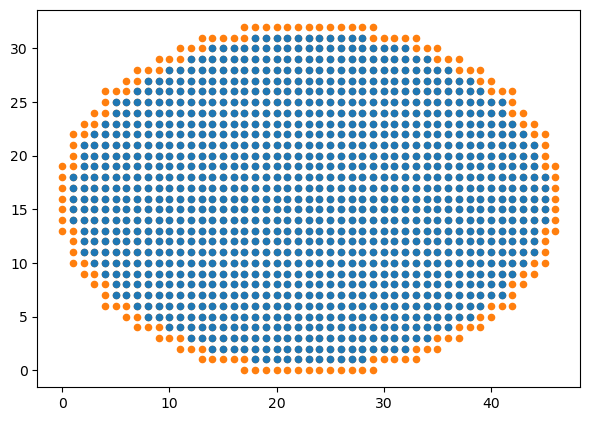

In [26]:
ener, states, degenerate_indices = tb.solve_eigenproblem_ellipse(parameters, number_of_bands = nbands, plot_shape = True)

/tmp/ipykernel_7110/2968494639.py:16: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()
/tmp/ipykernel_7110/2968494639.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure(figsize = (7,7))


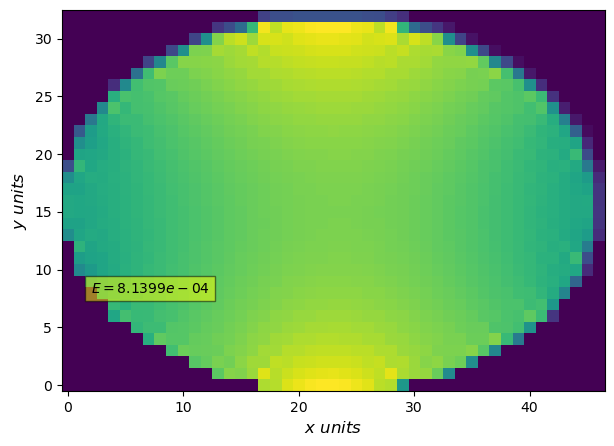

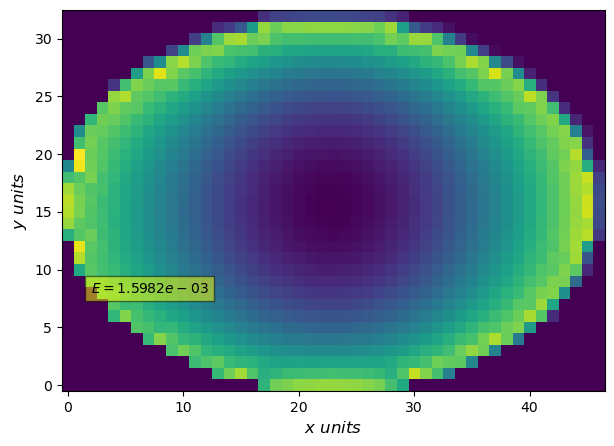

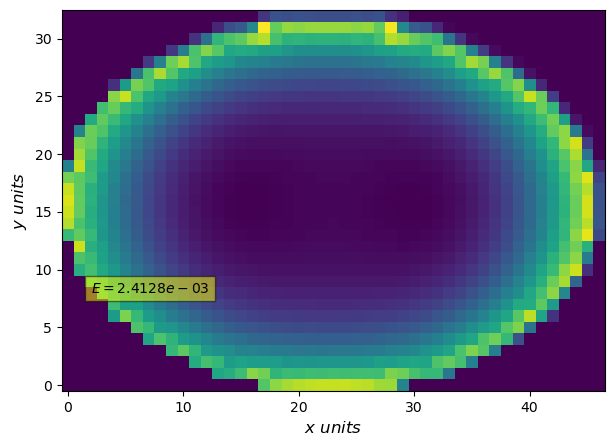

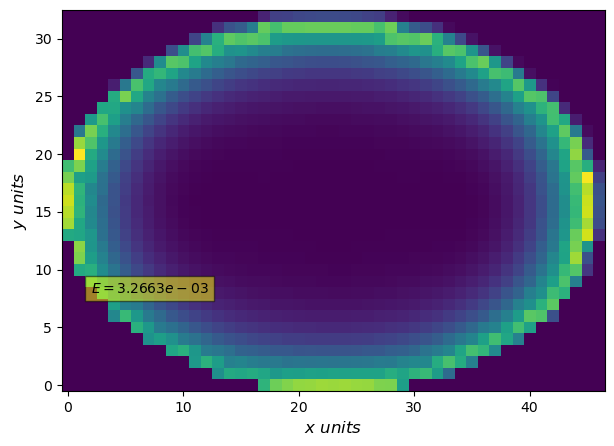

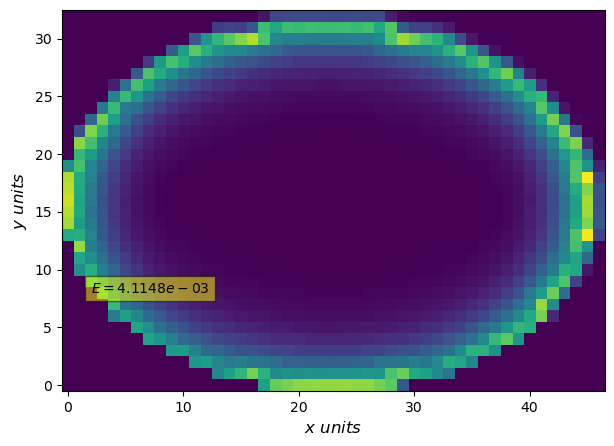

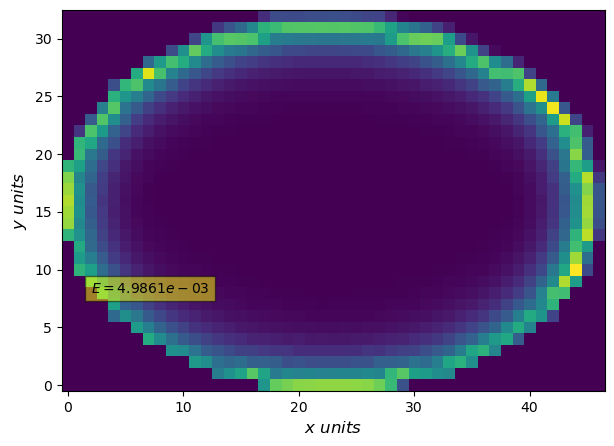

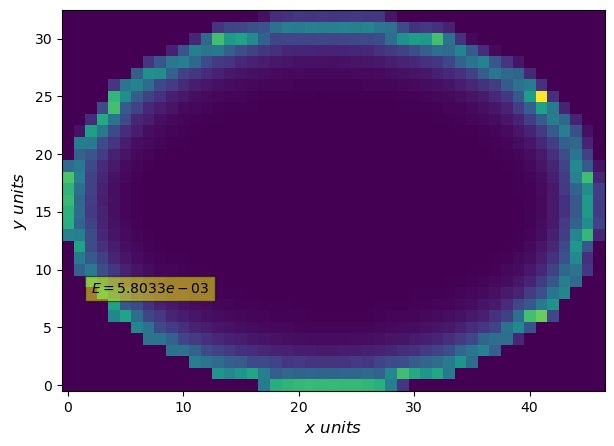

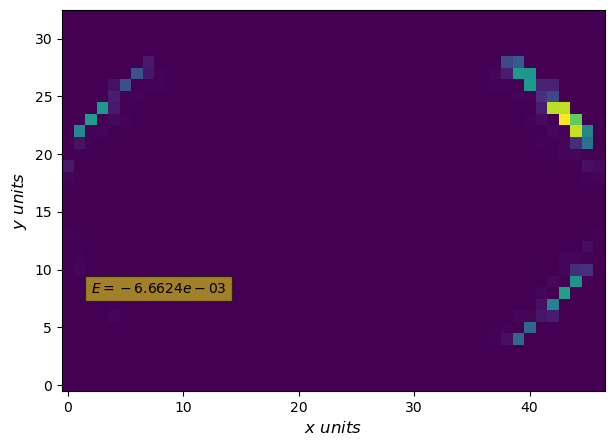

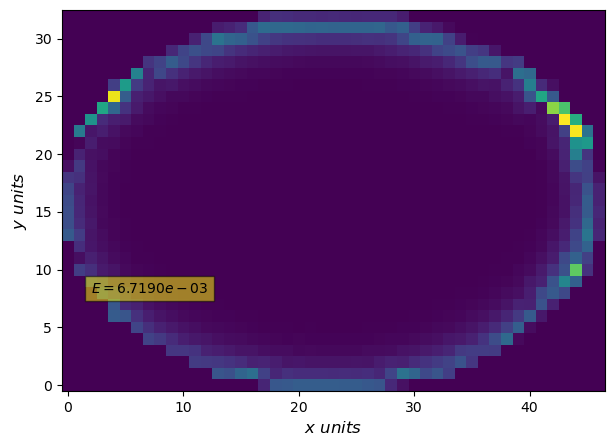

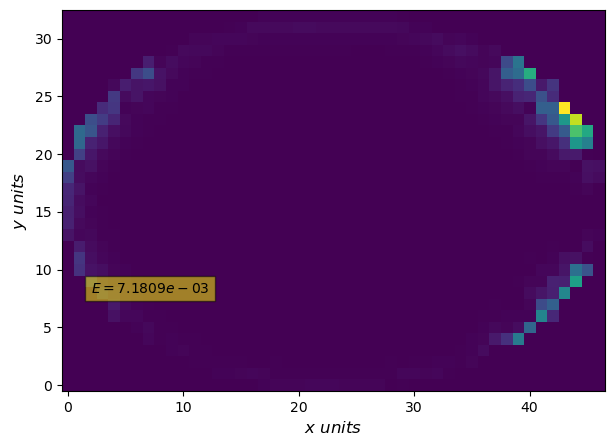

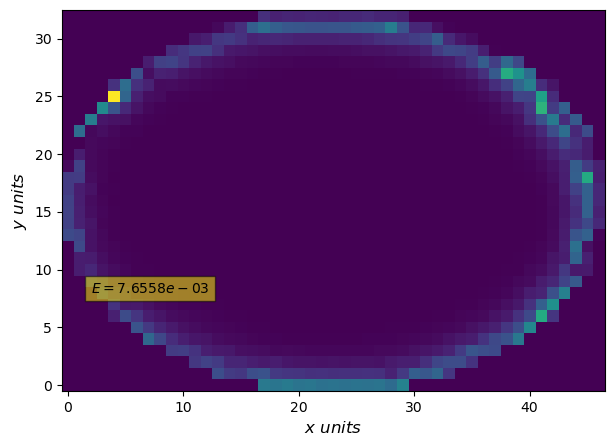

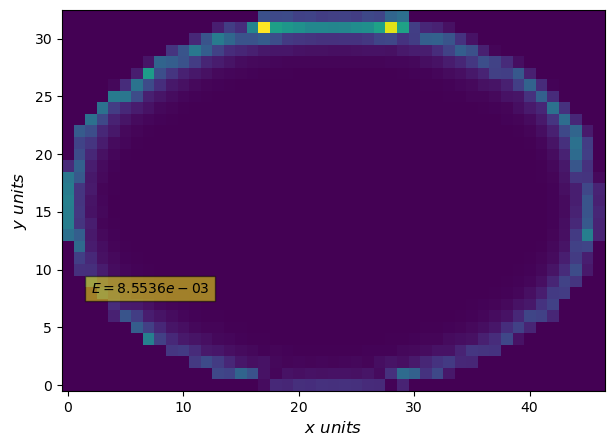

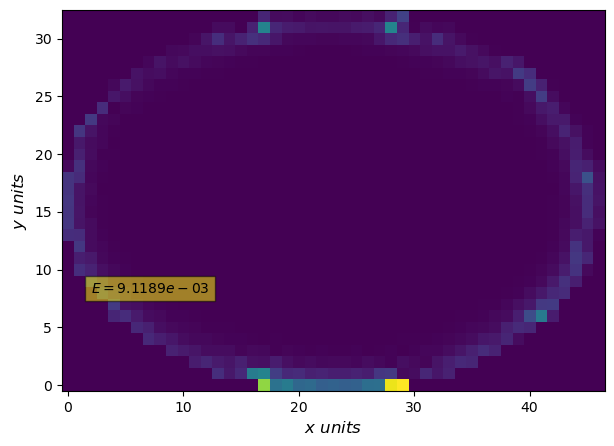

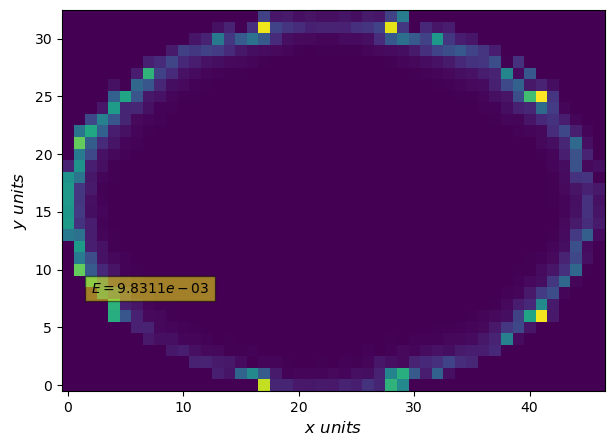

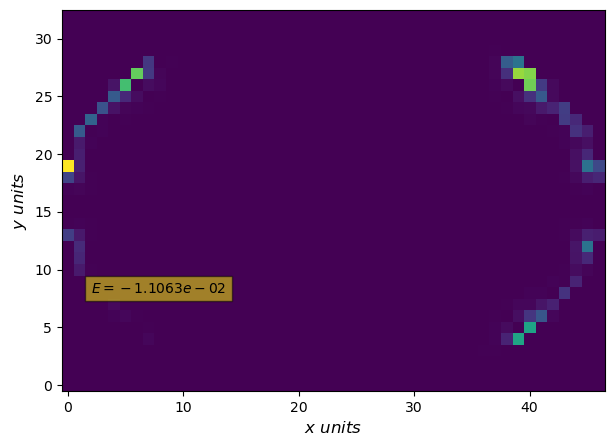

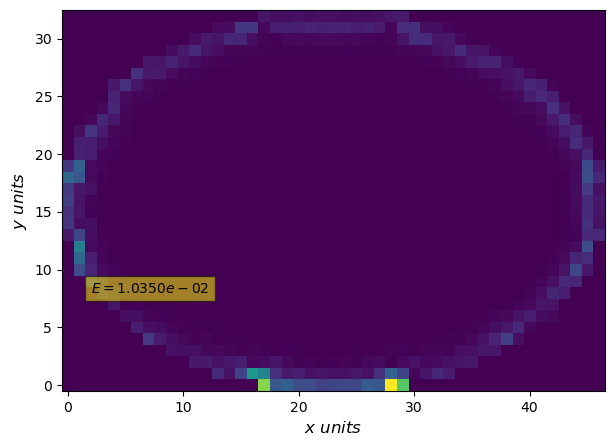

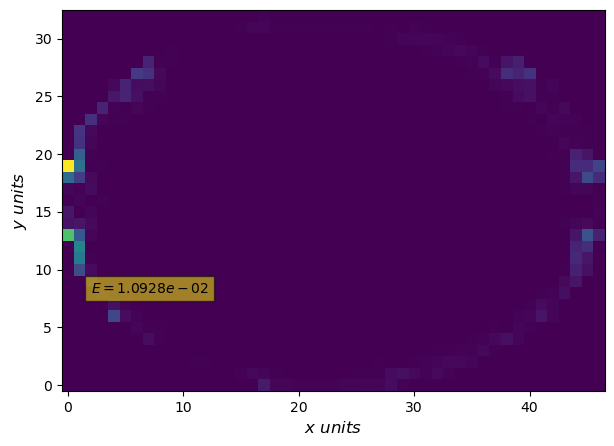

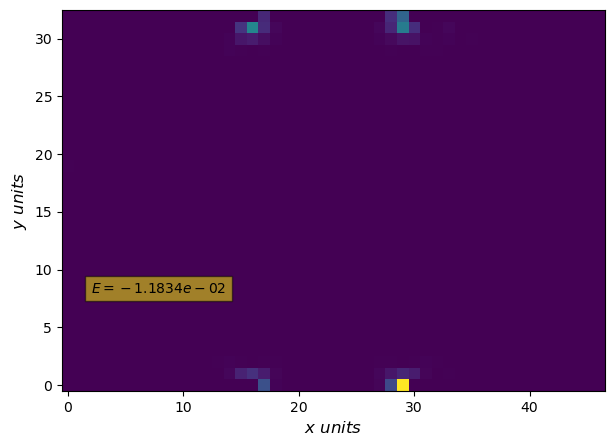

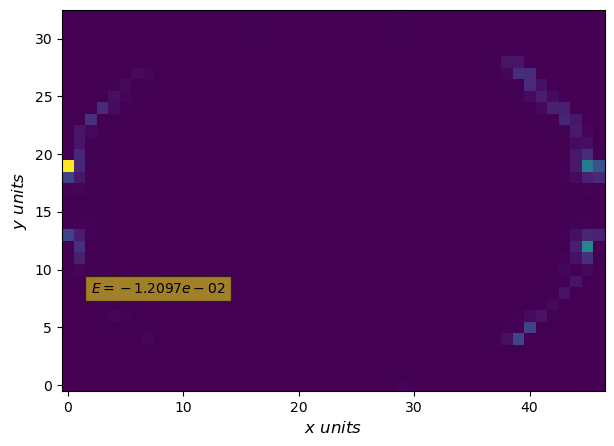

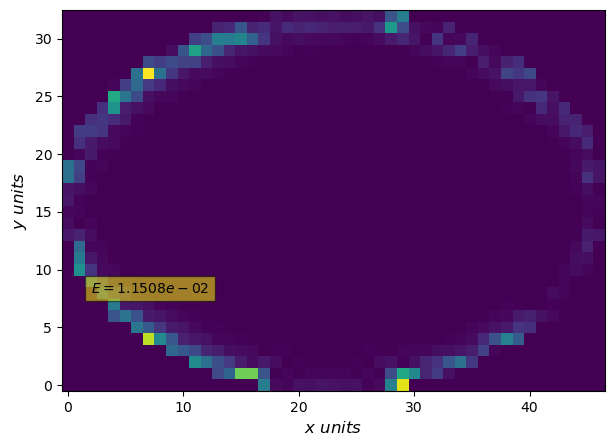

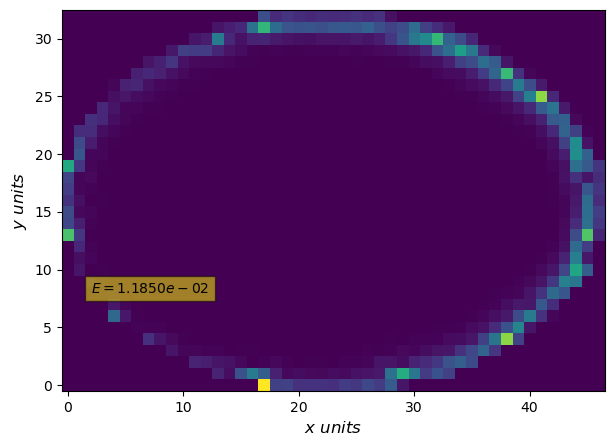

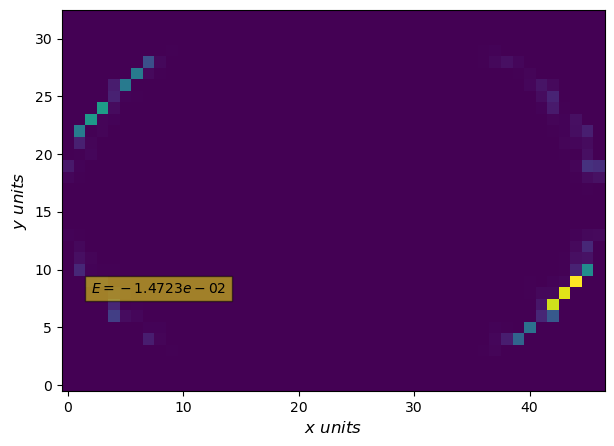

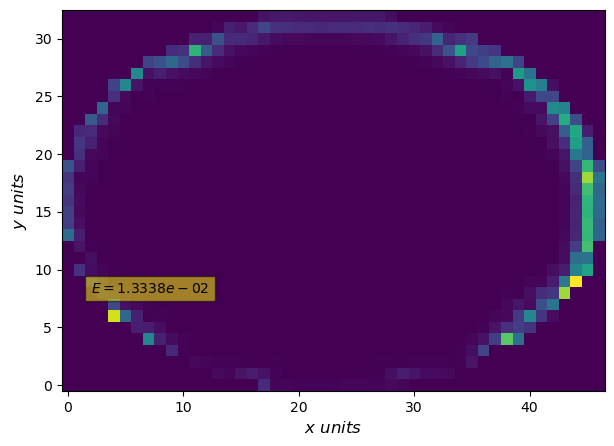

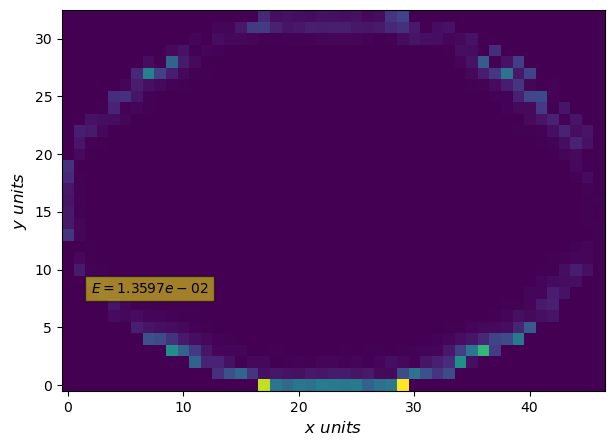

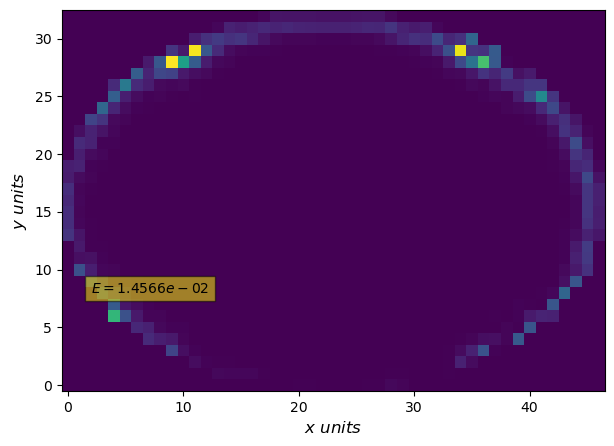

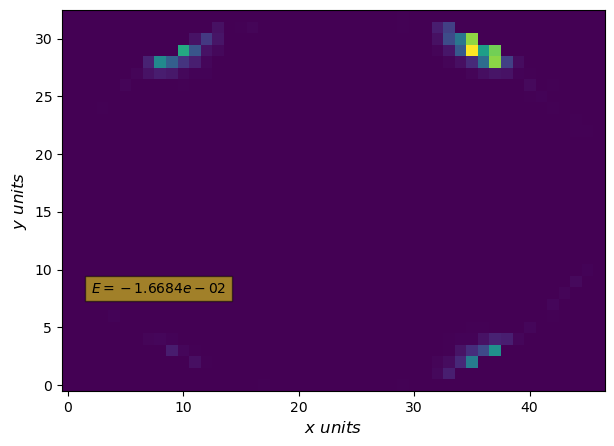

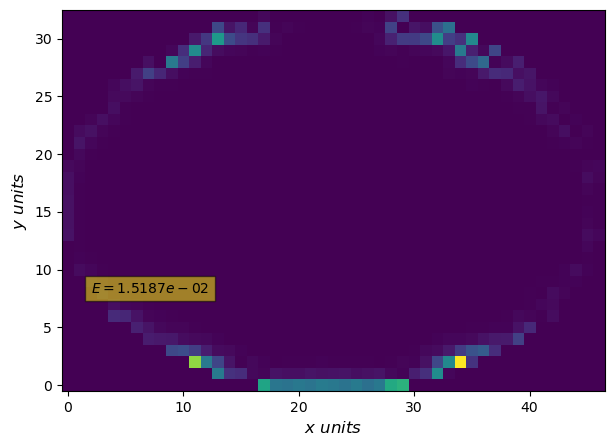

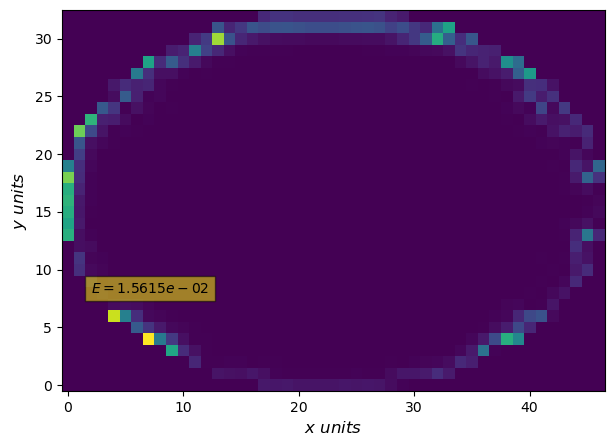

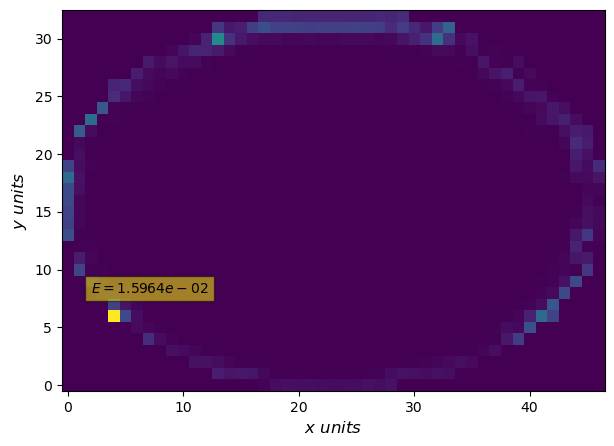

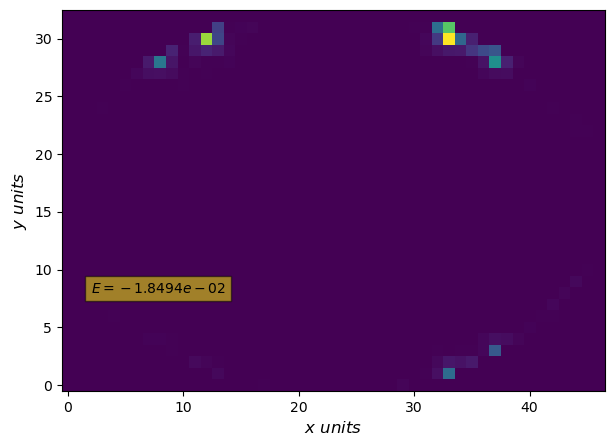

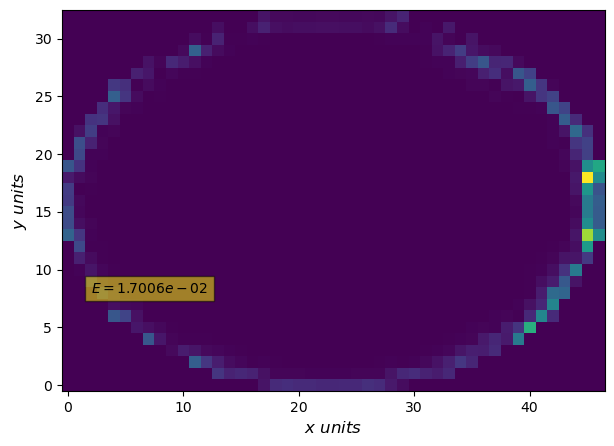

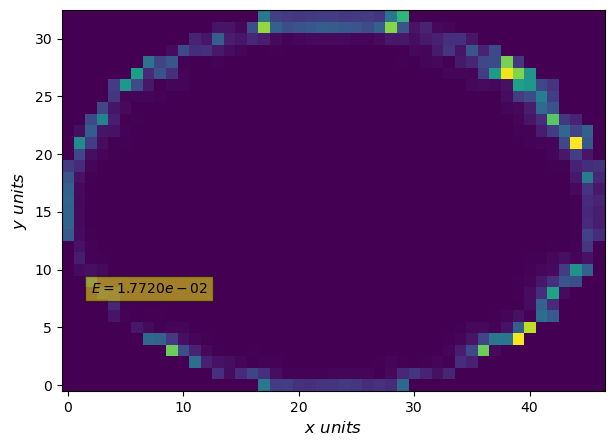

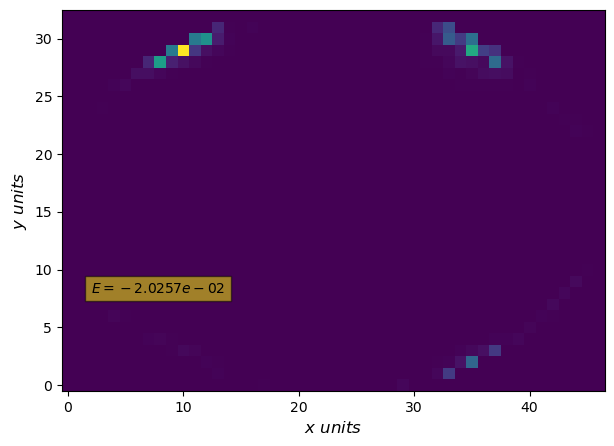

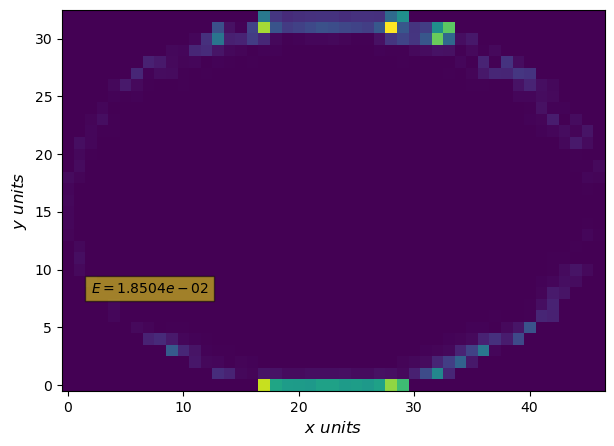

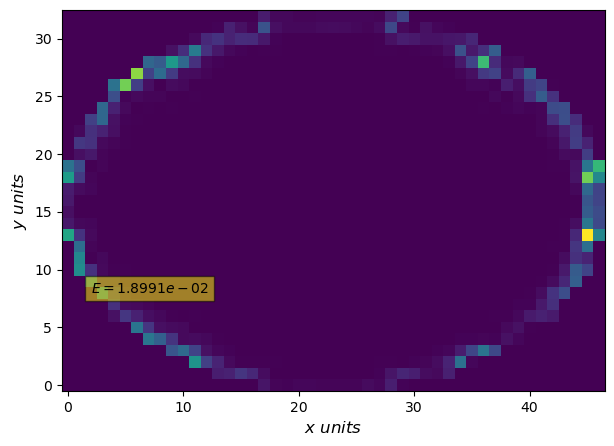

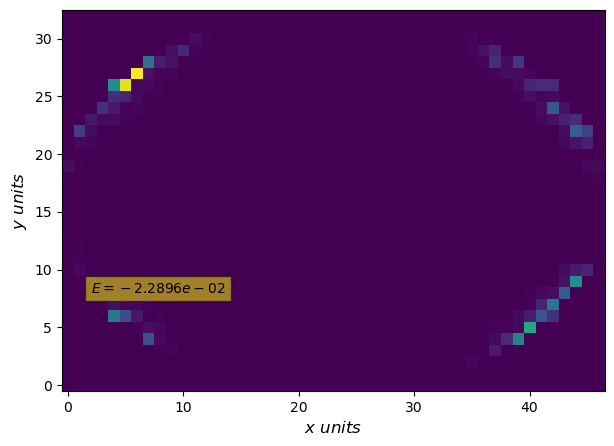

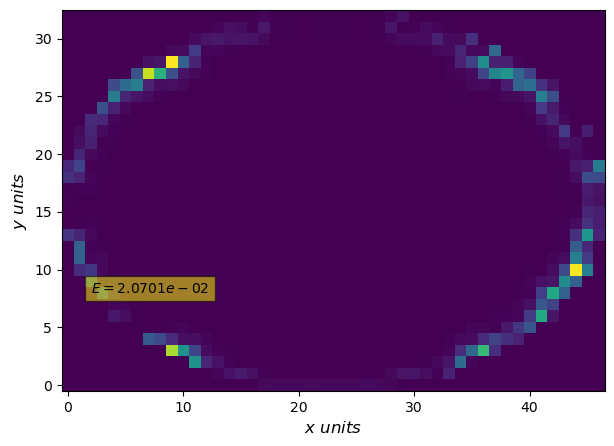

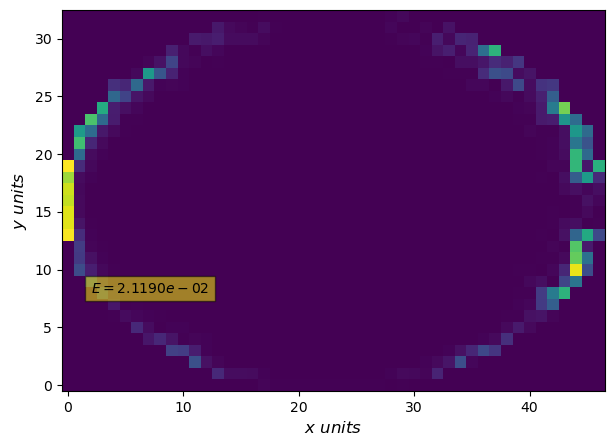

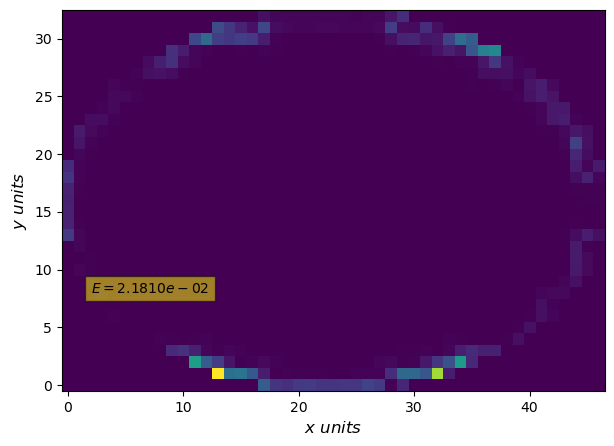

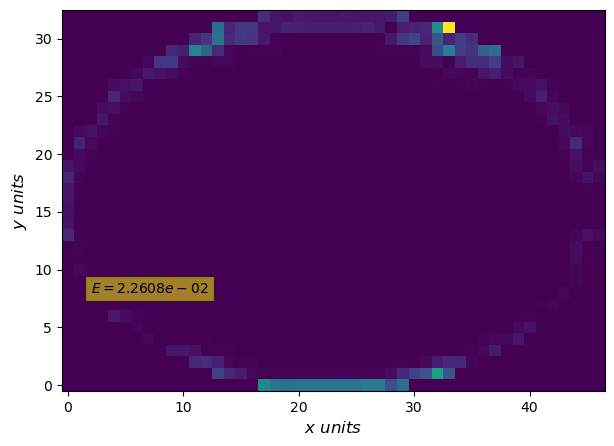

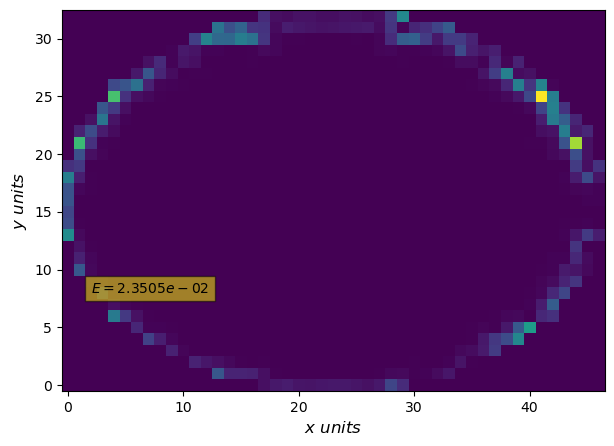

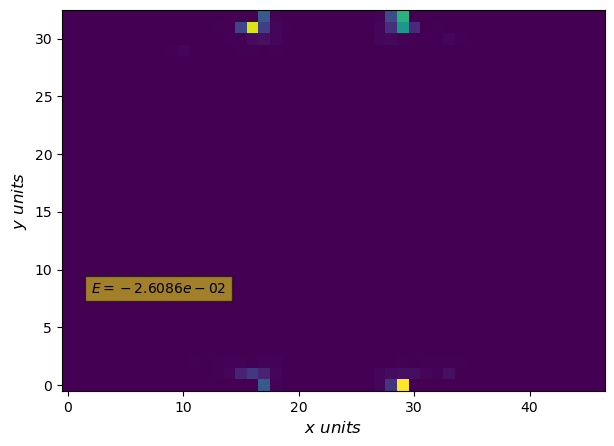

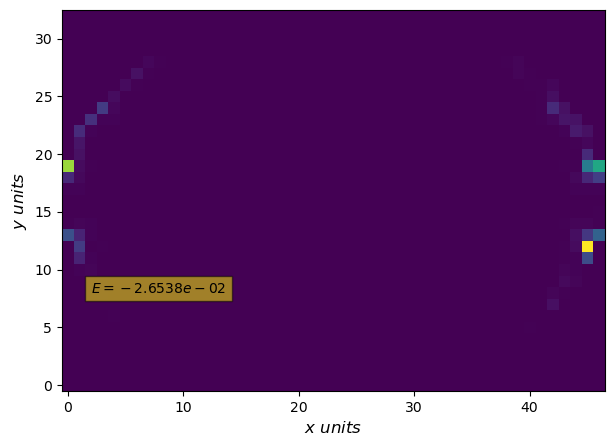

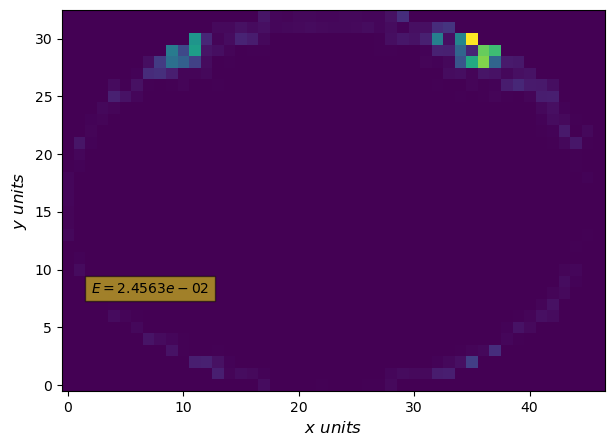

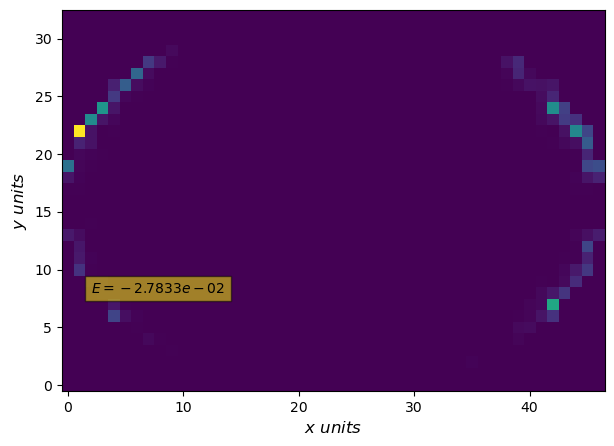

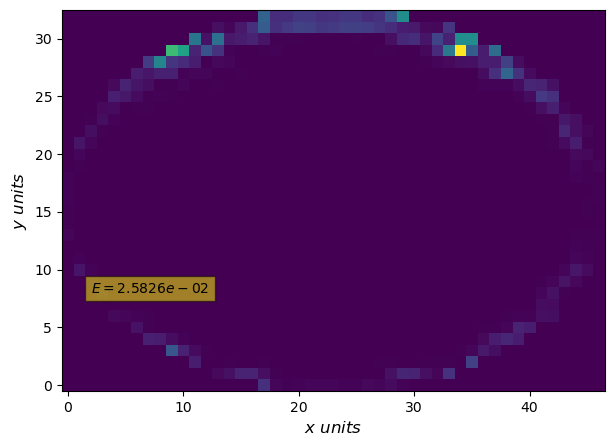

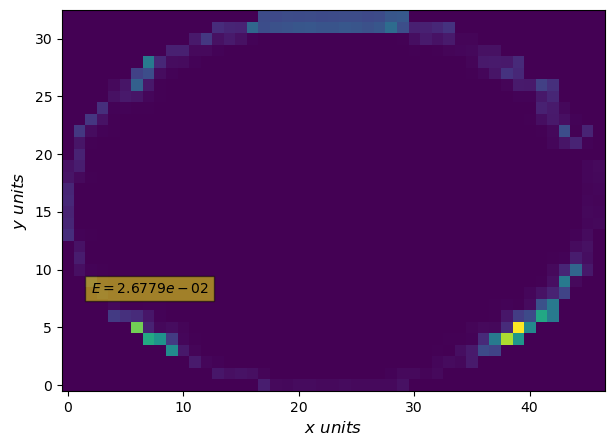

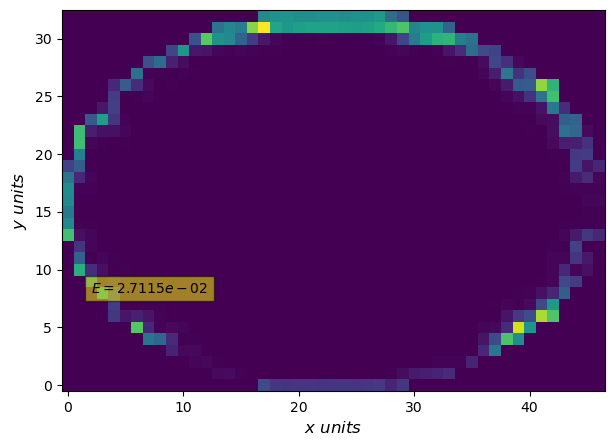

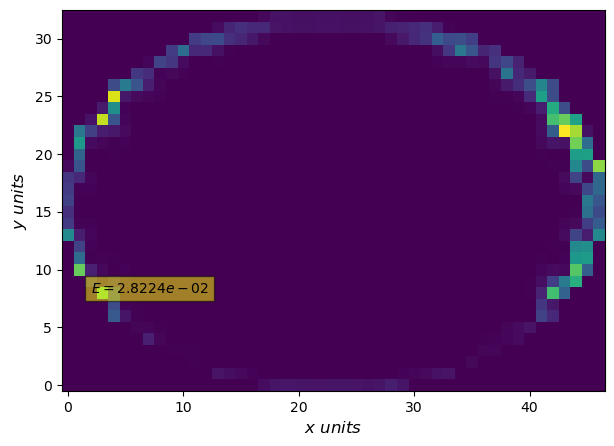

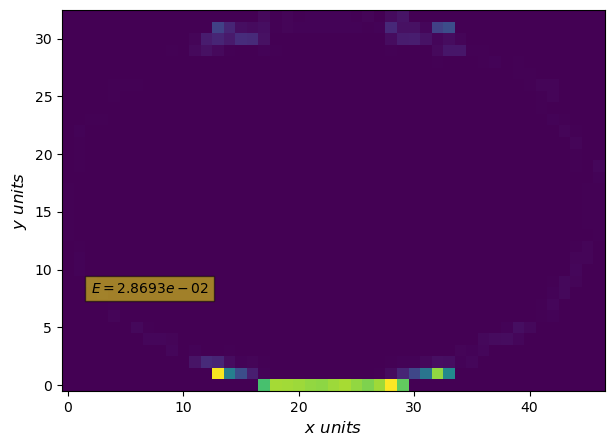

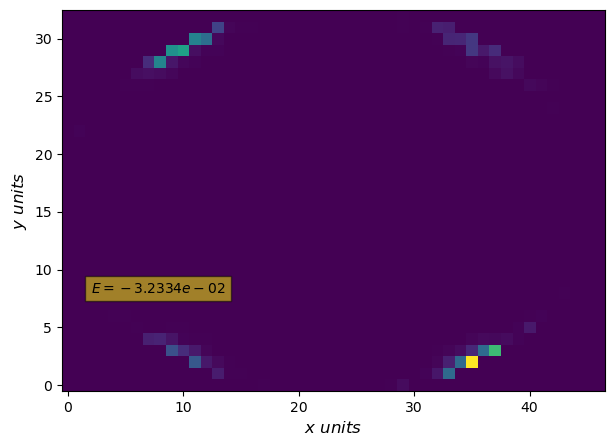

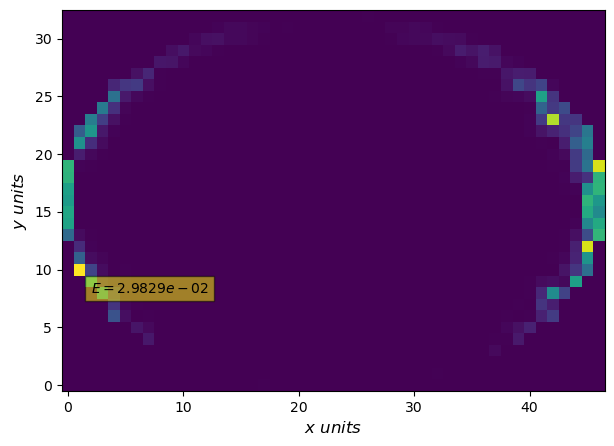

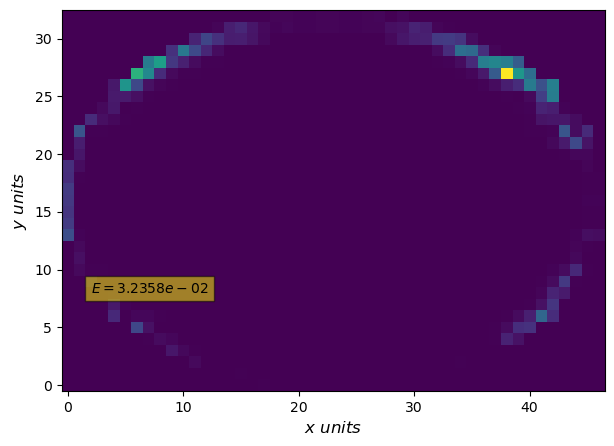

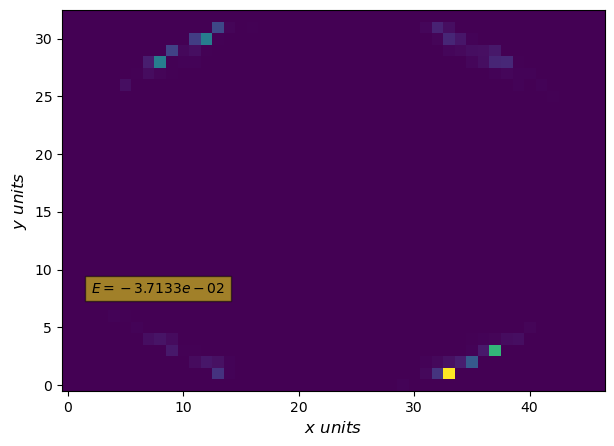

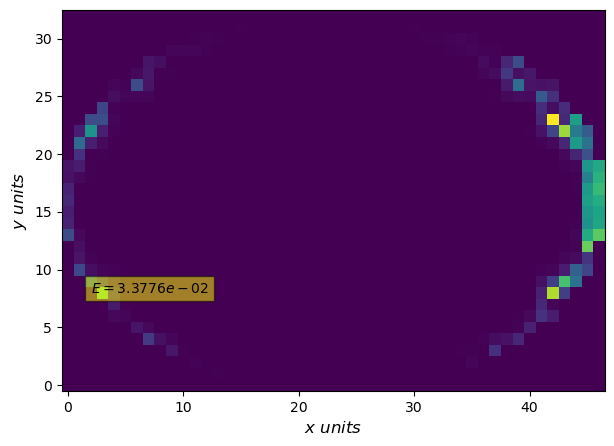

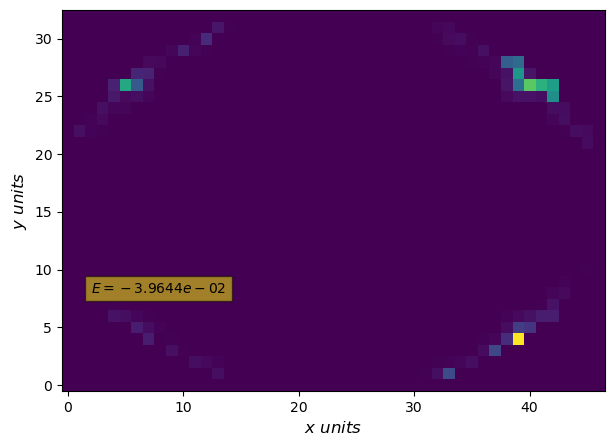

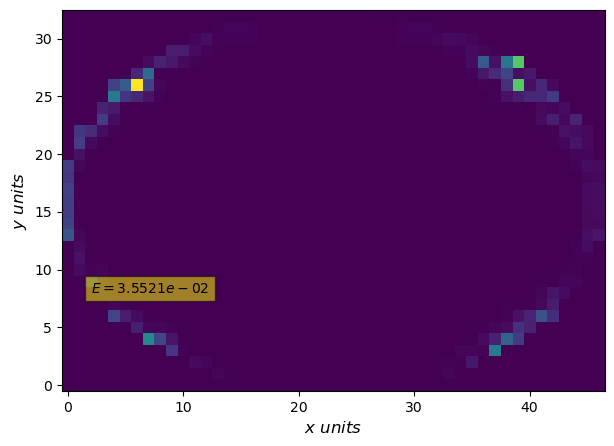

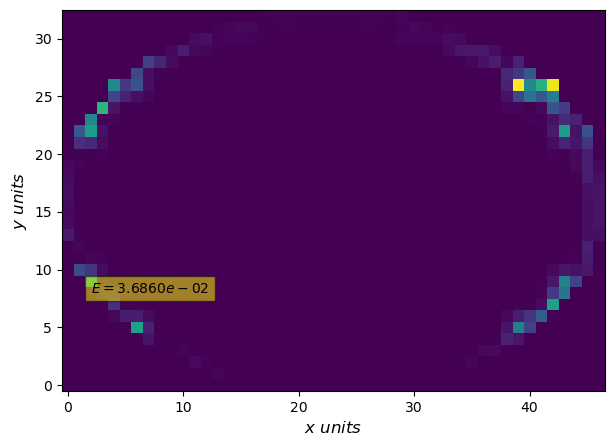

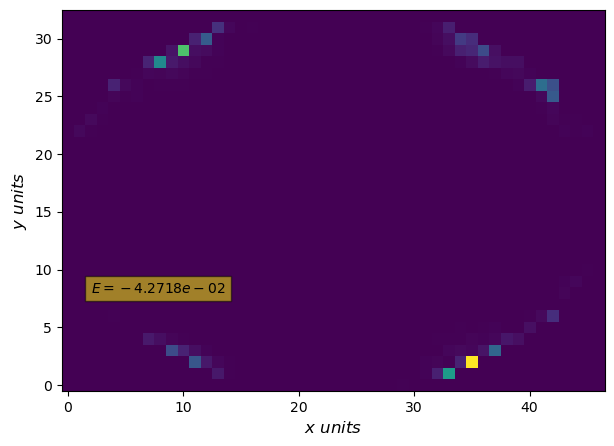

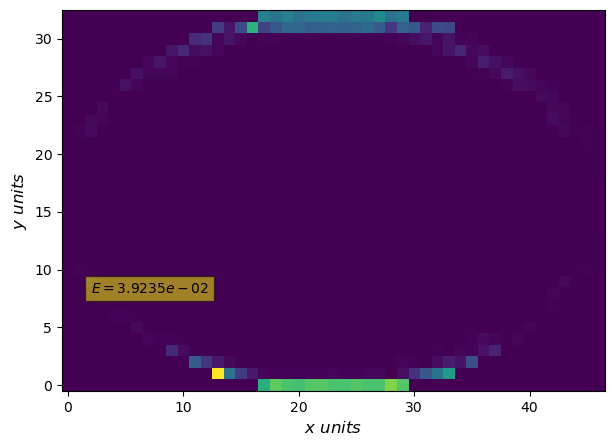

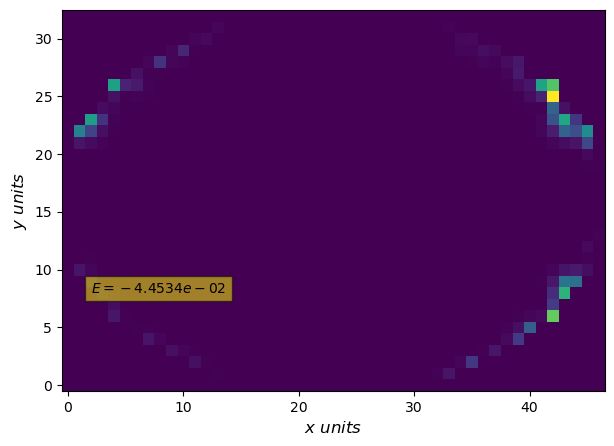

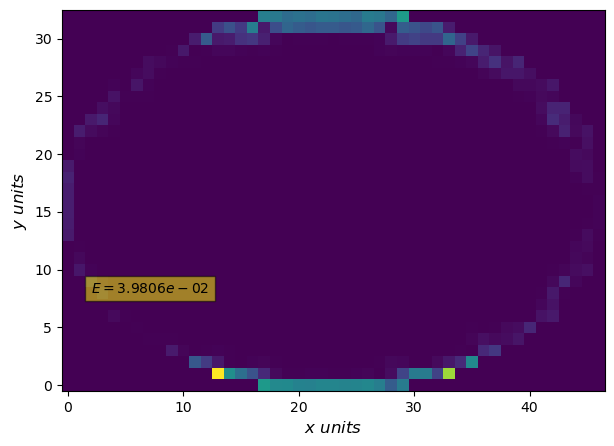

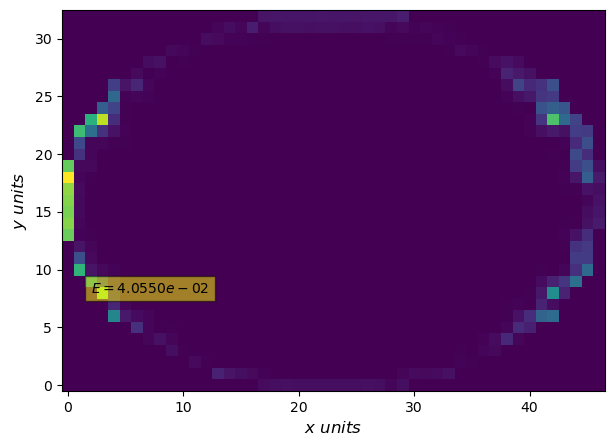

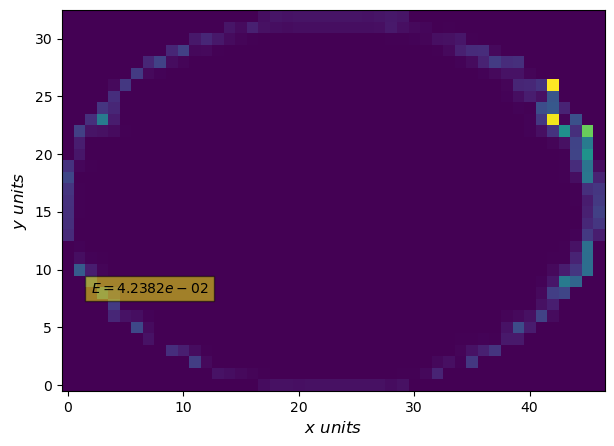

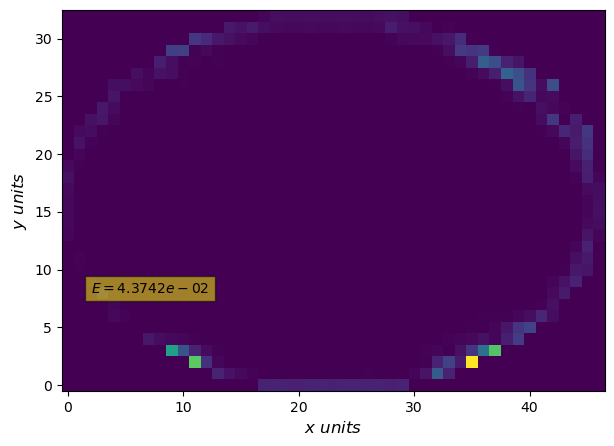

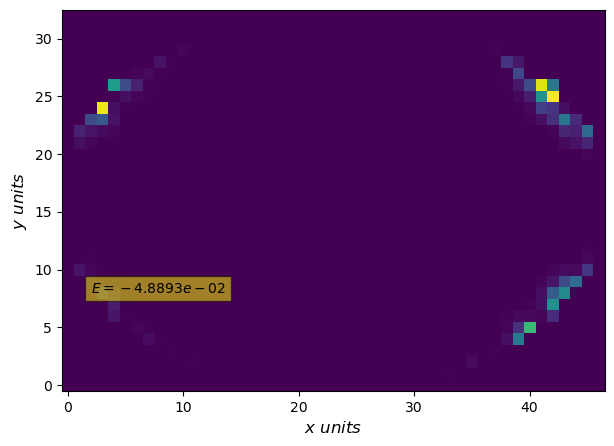

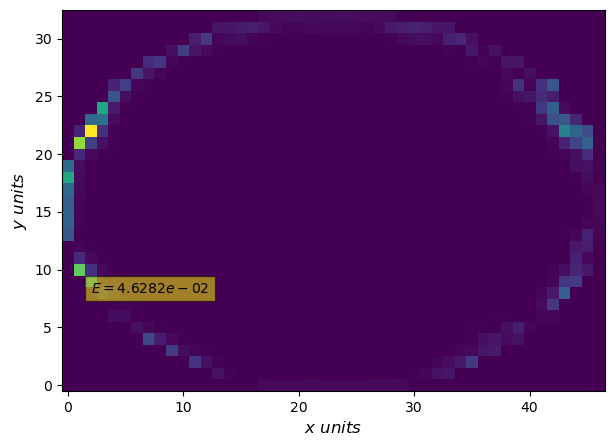

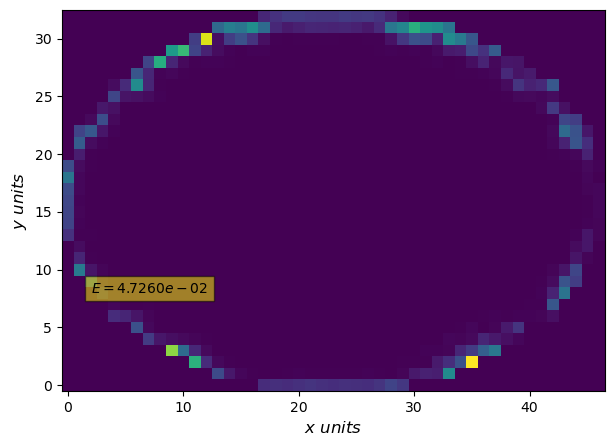

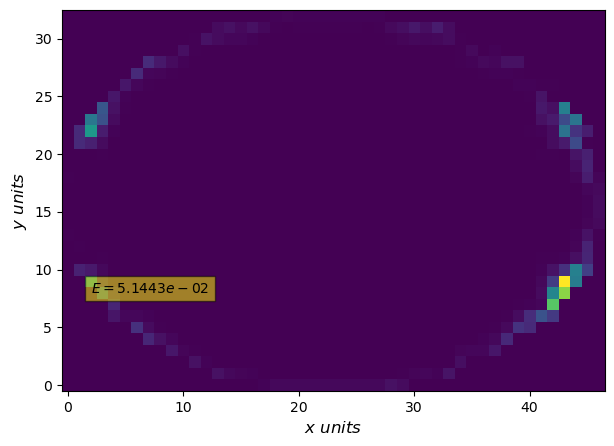

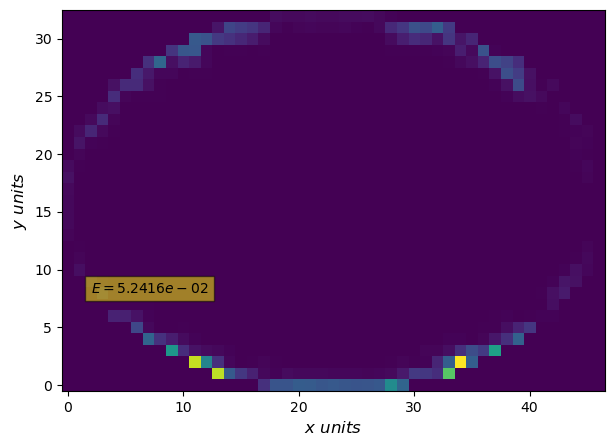

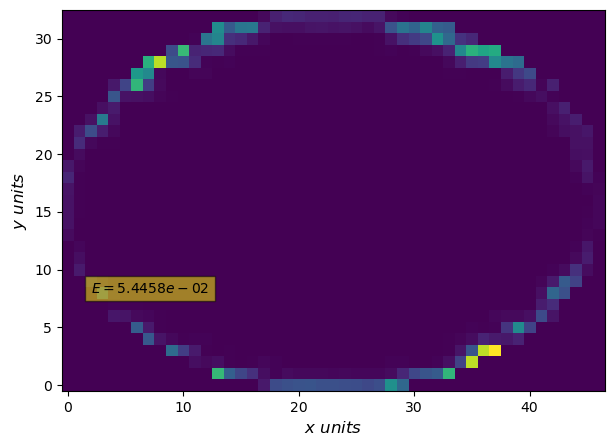

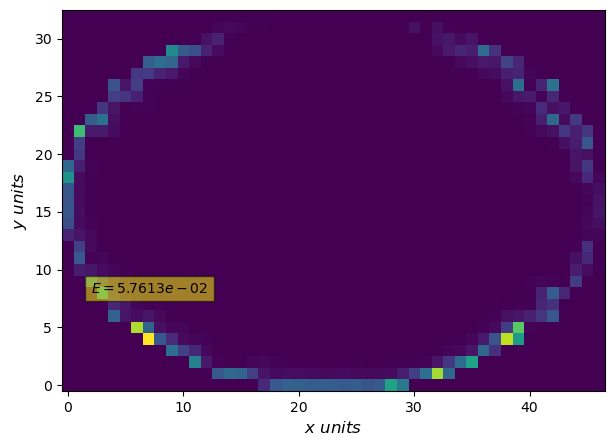

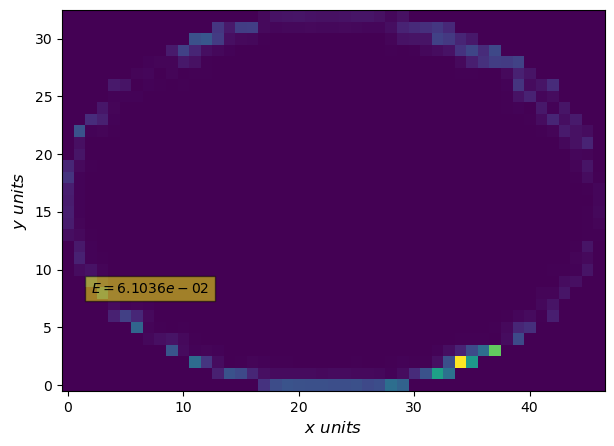

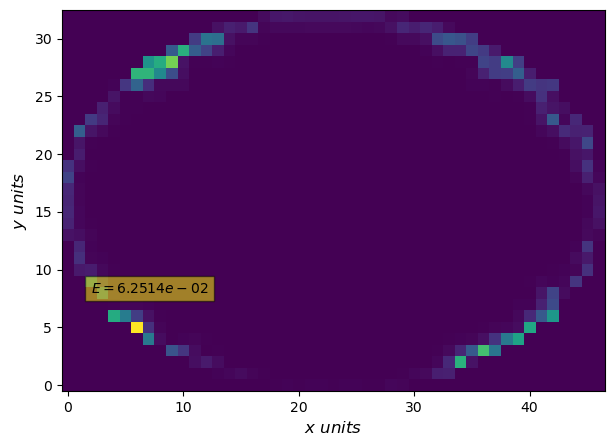

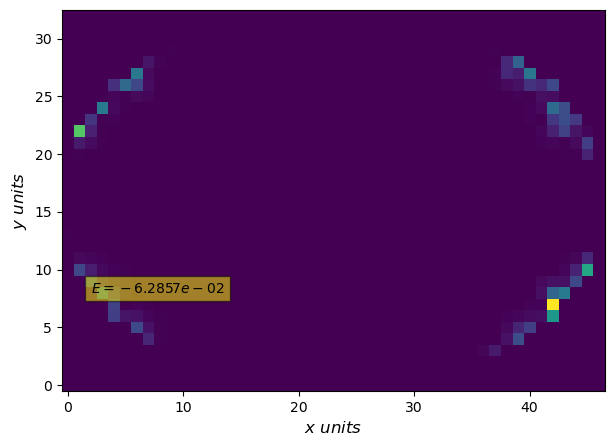

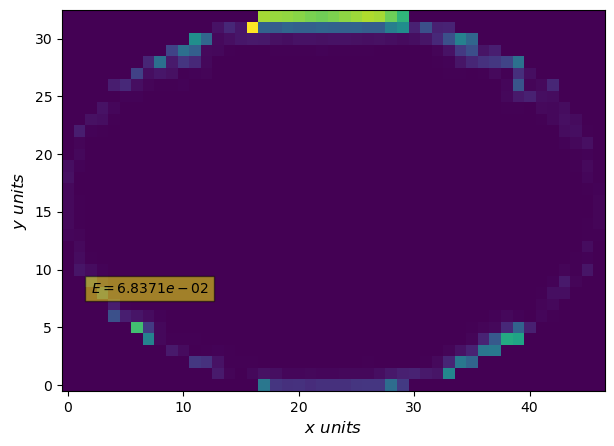

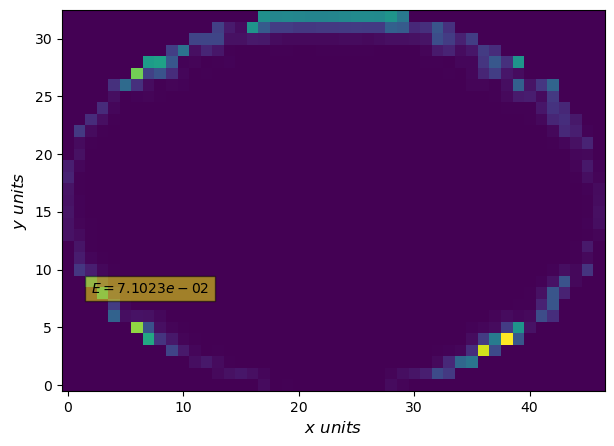

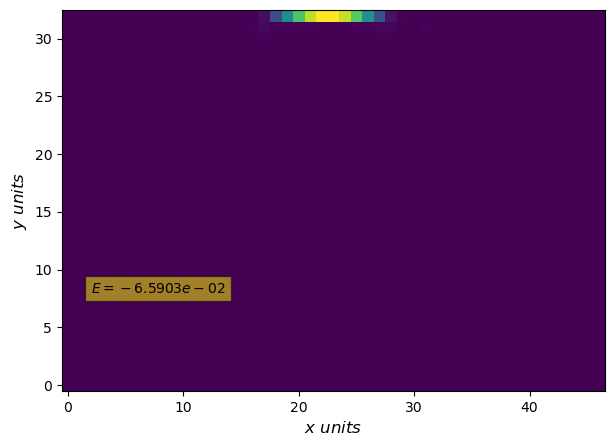

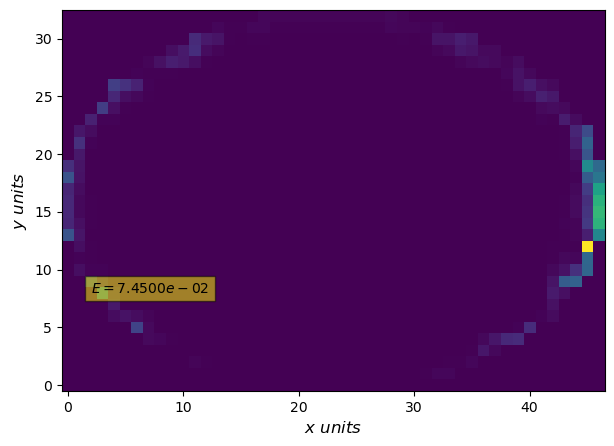

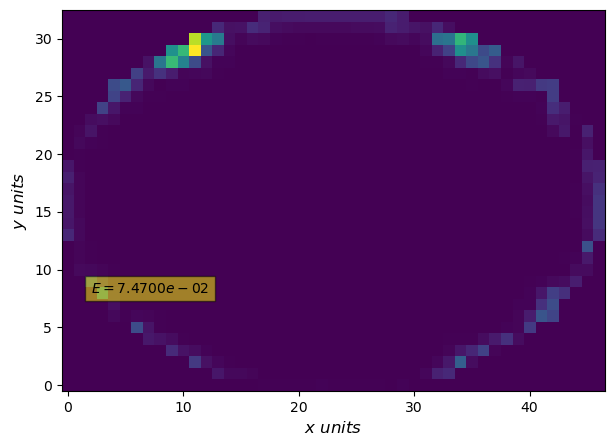

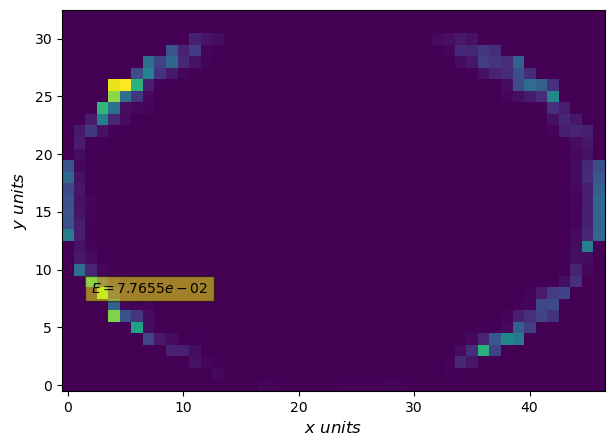

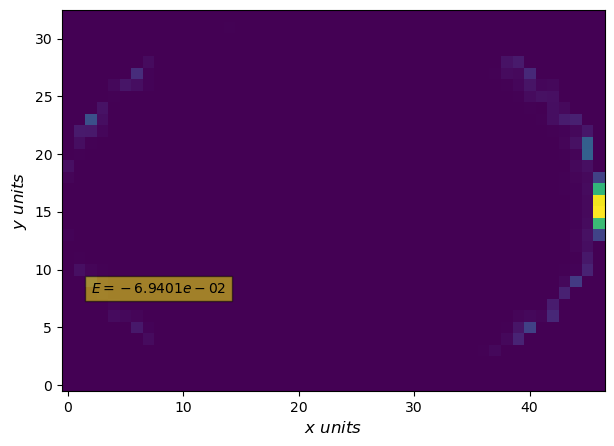

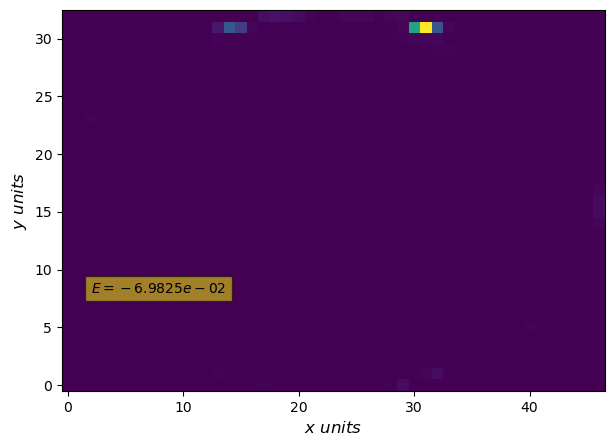

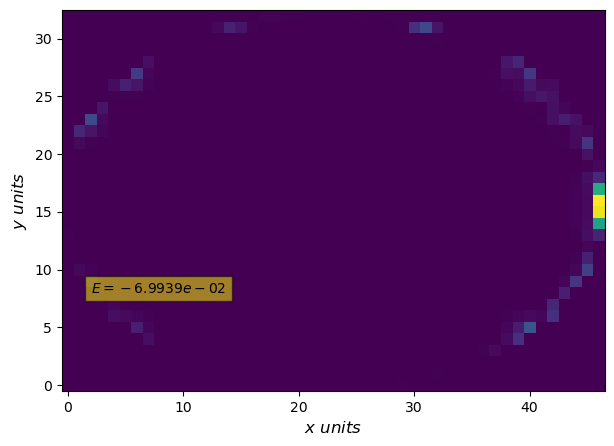

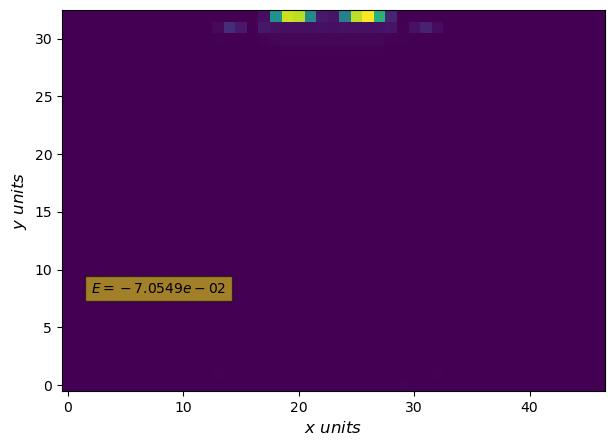

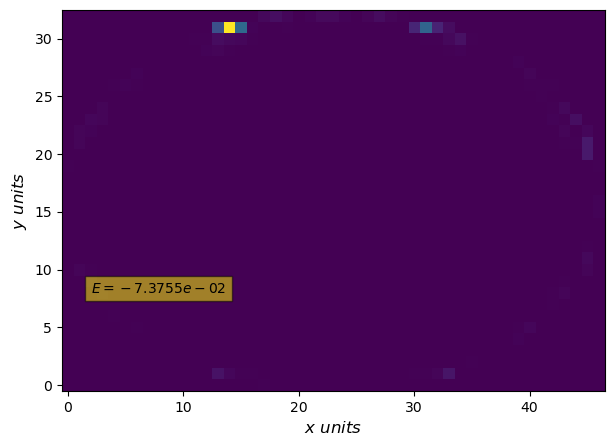

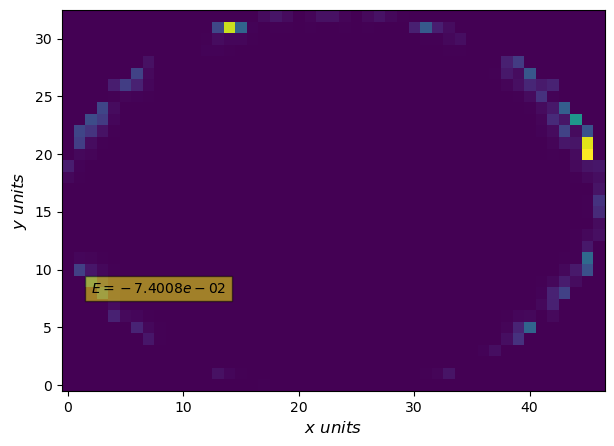

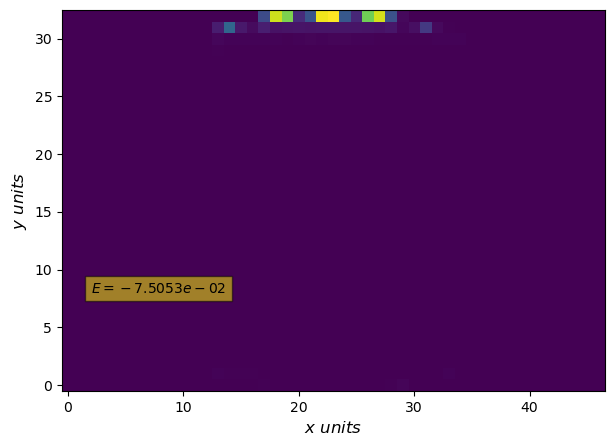

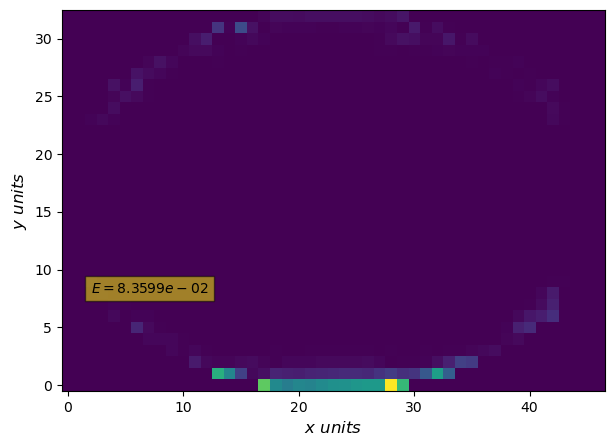

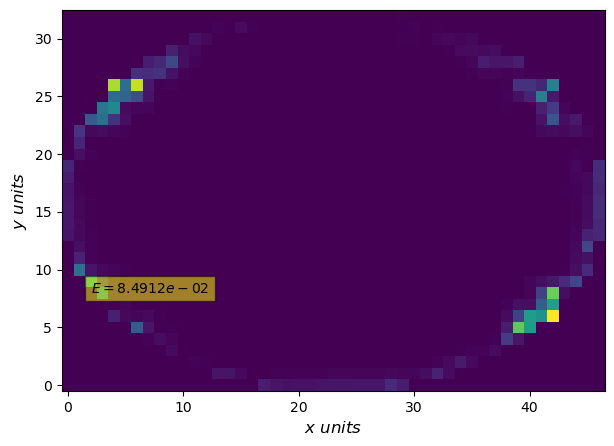

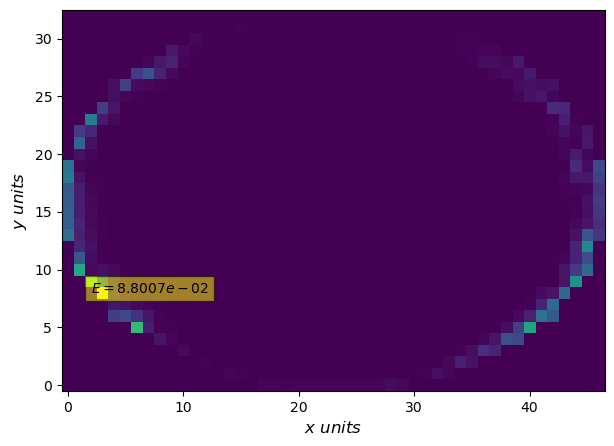

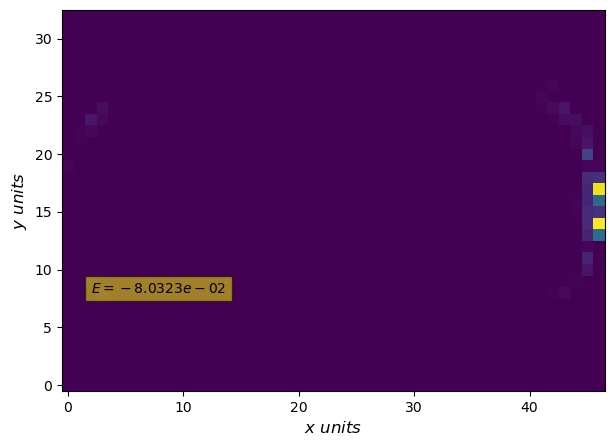

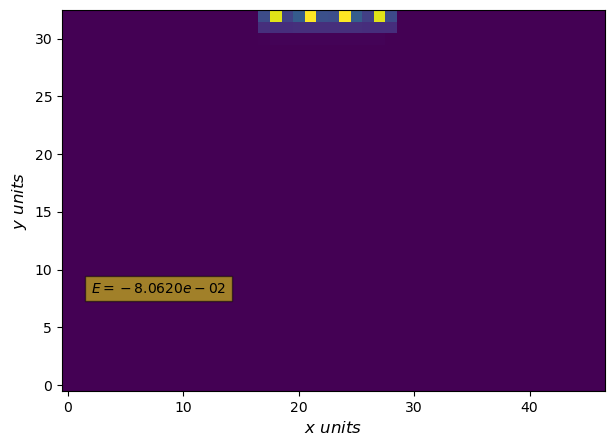

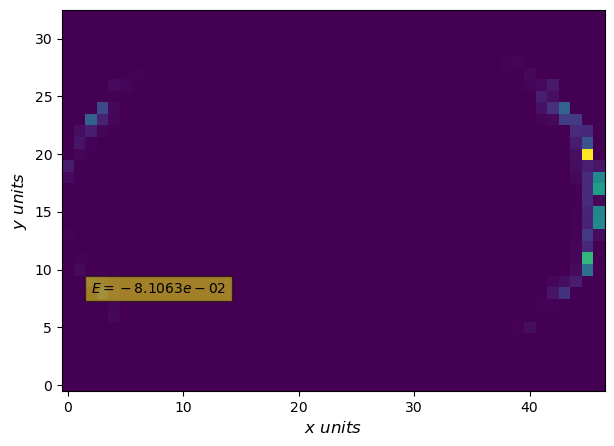

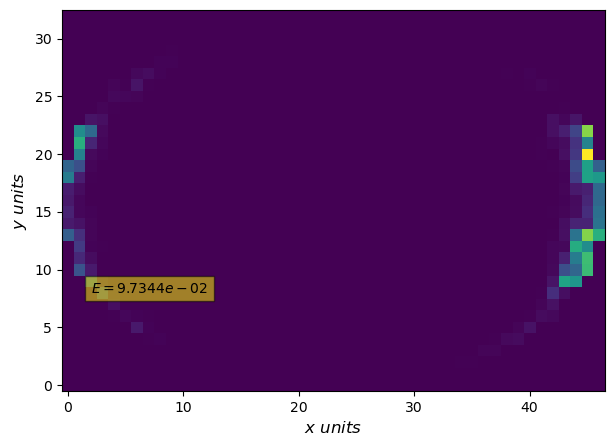

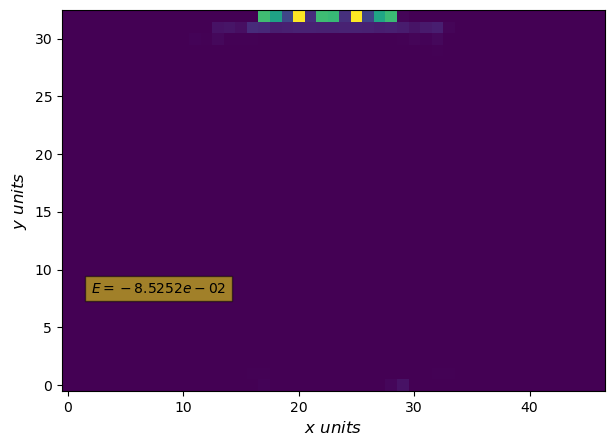

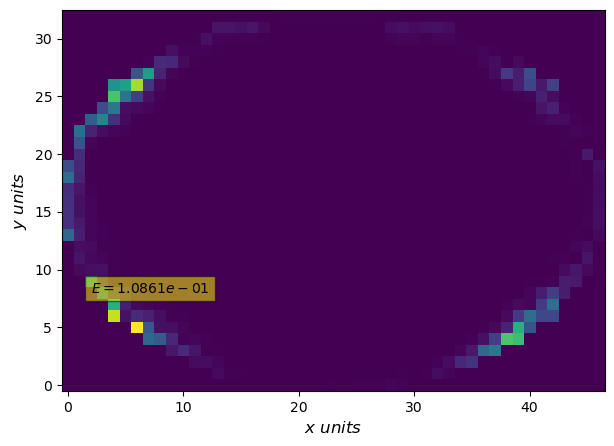

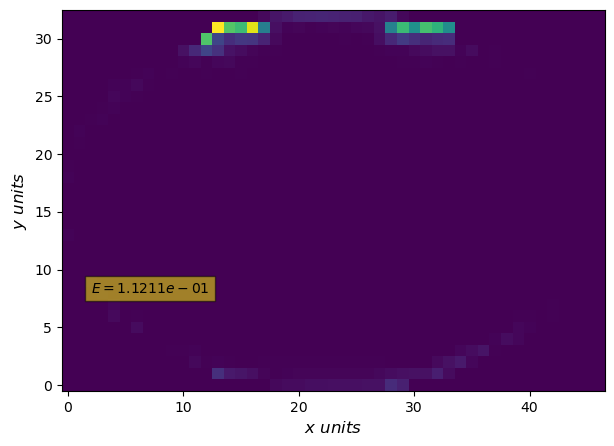

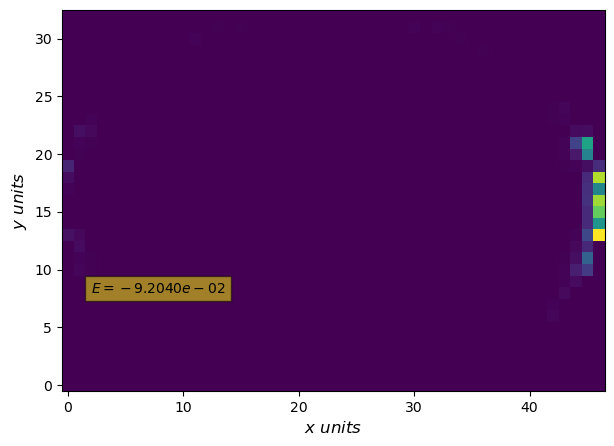

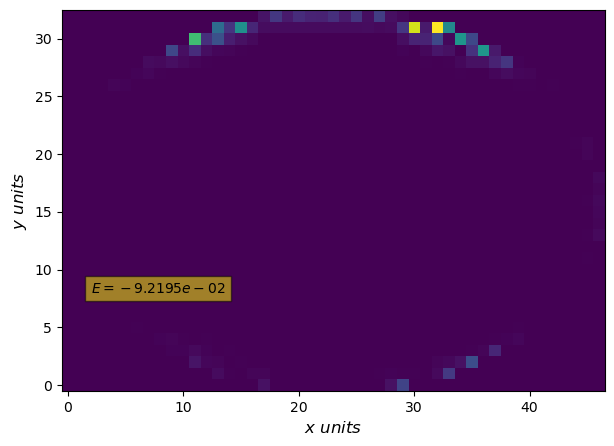

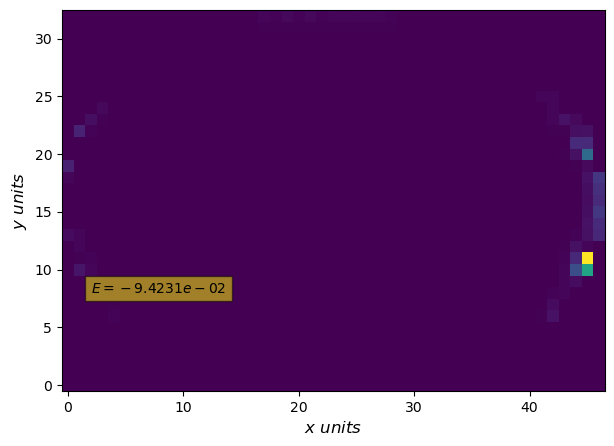

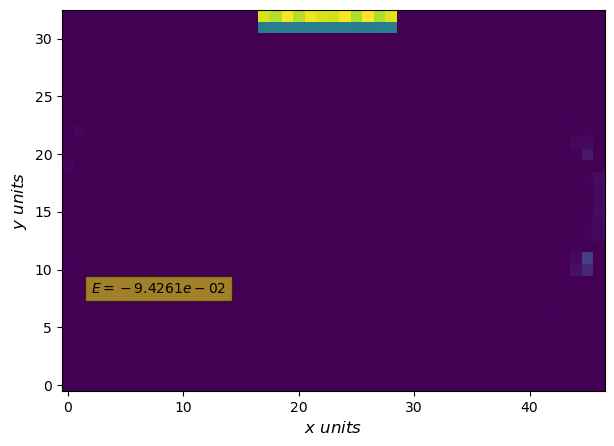

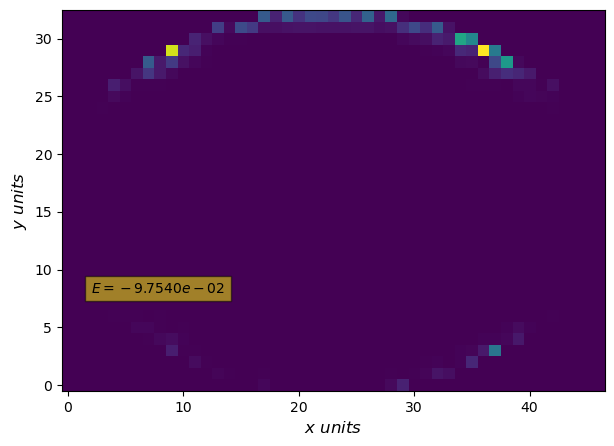

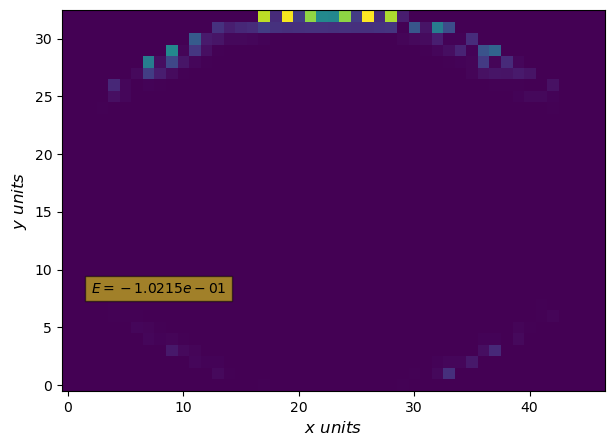

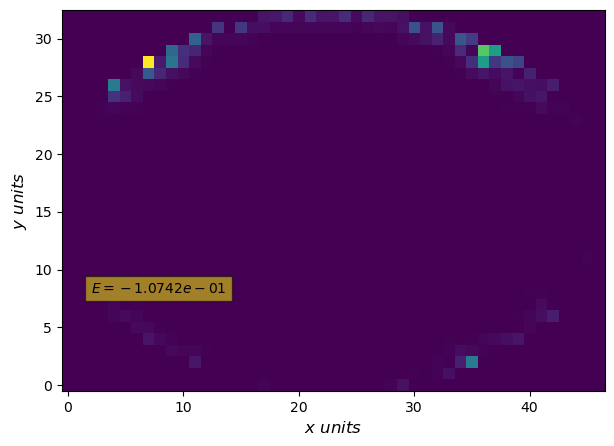

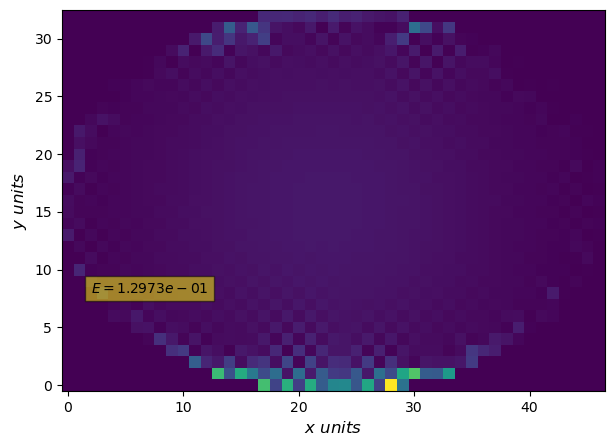

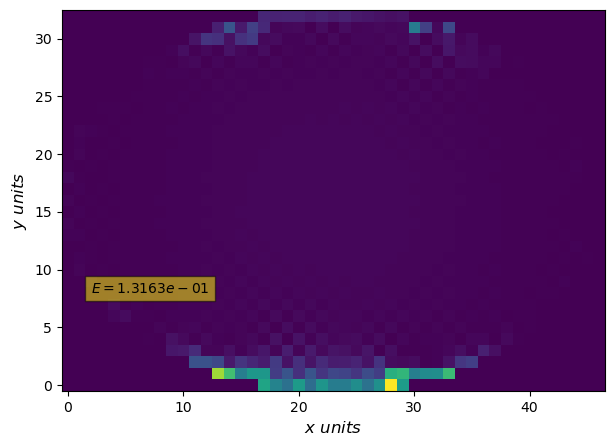

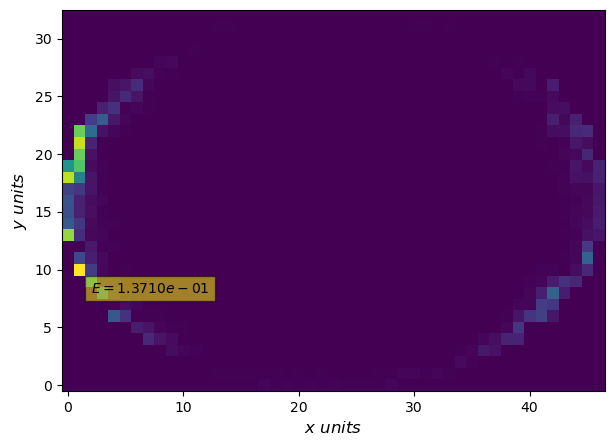

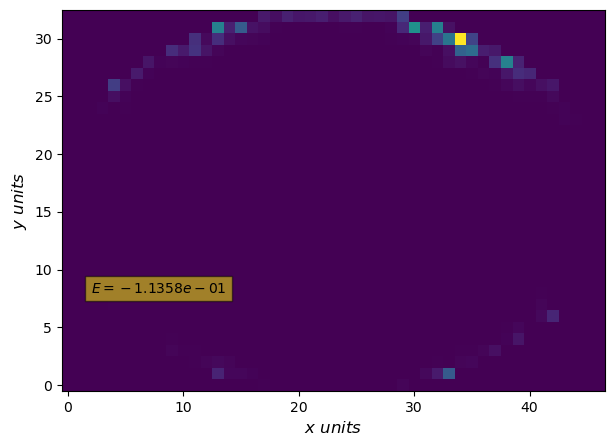

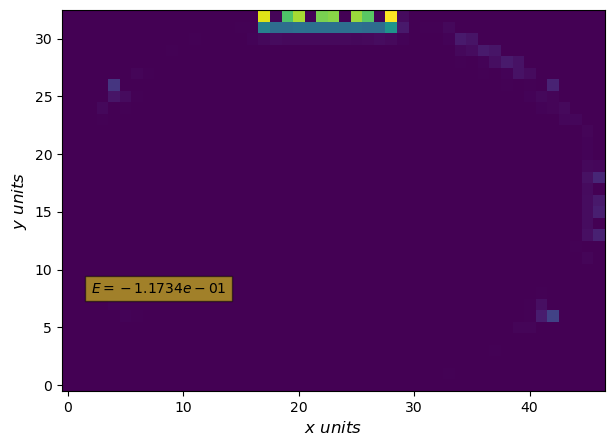

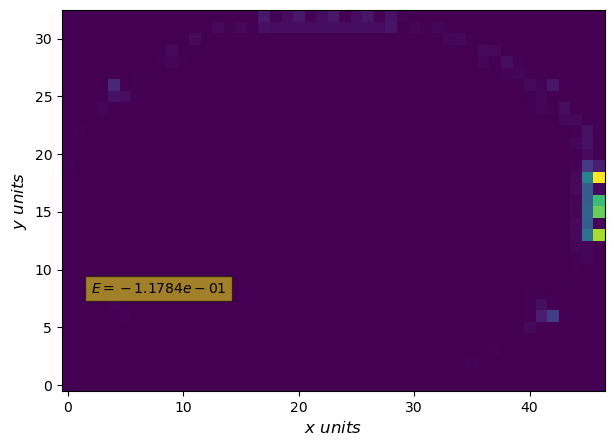

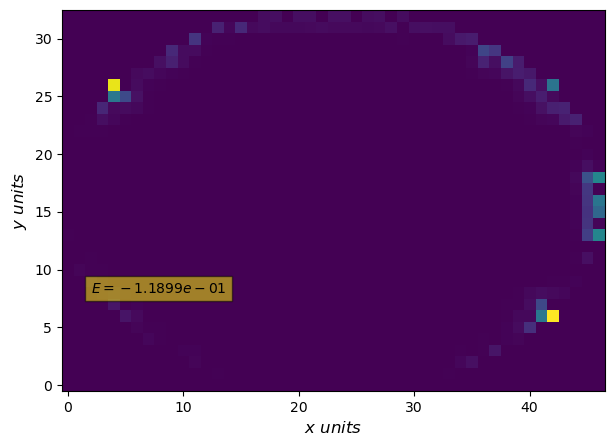

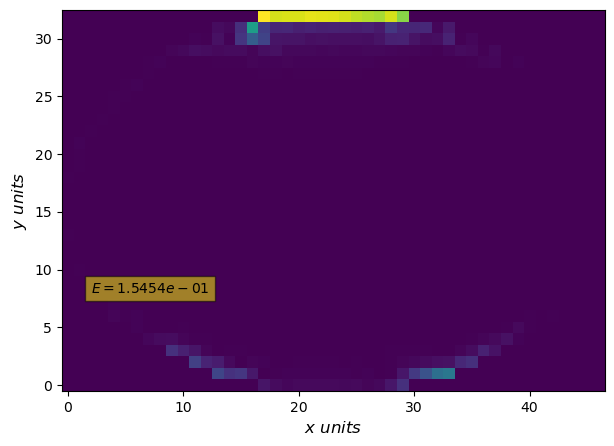

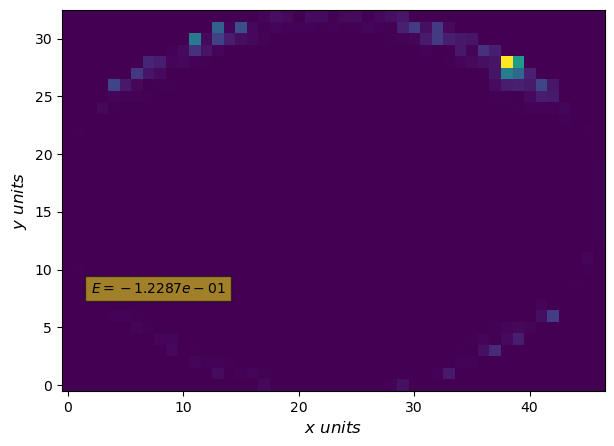

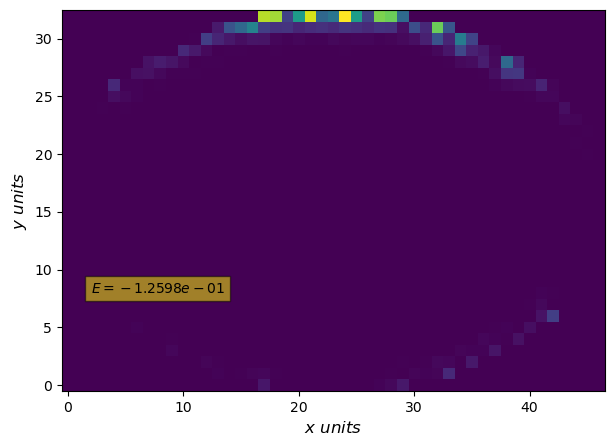

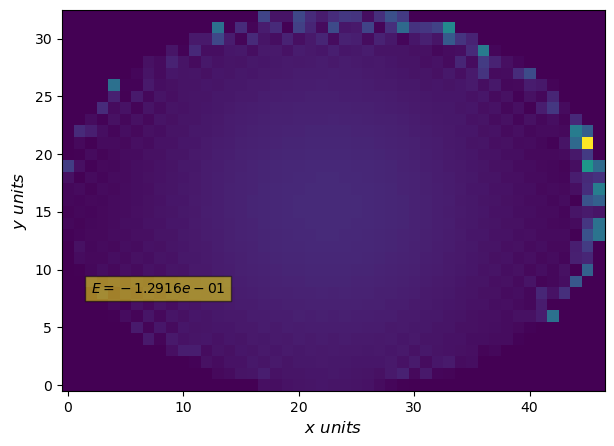

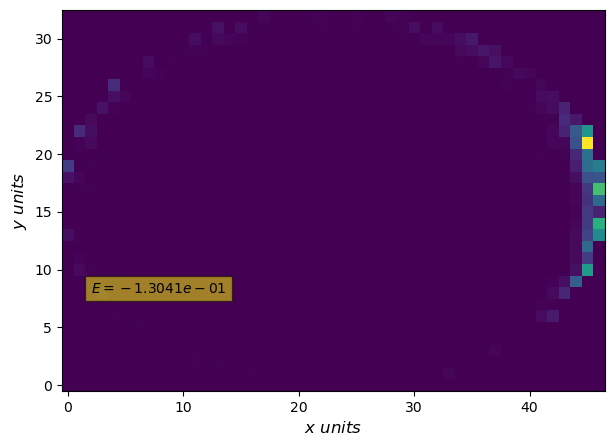

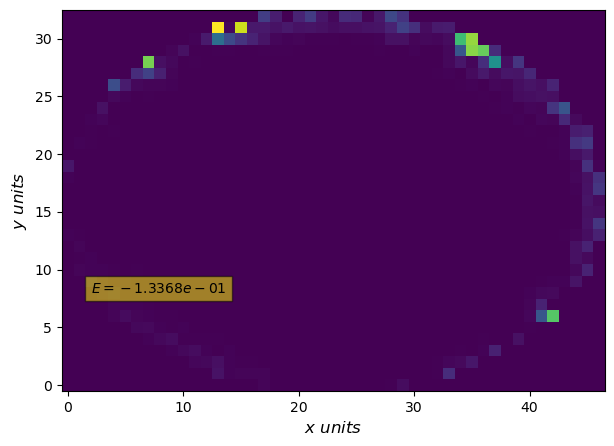

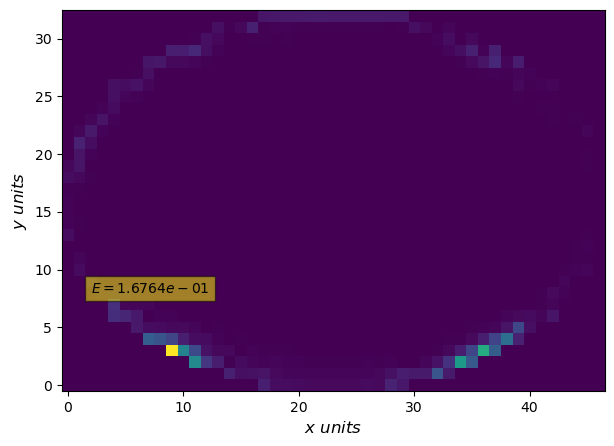

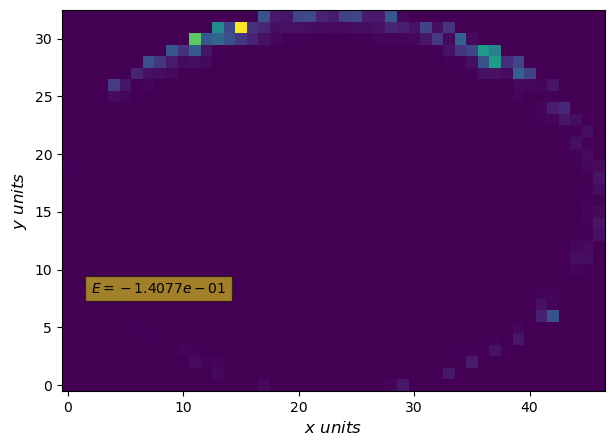

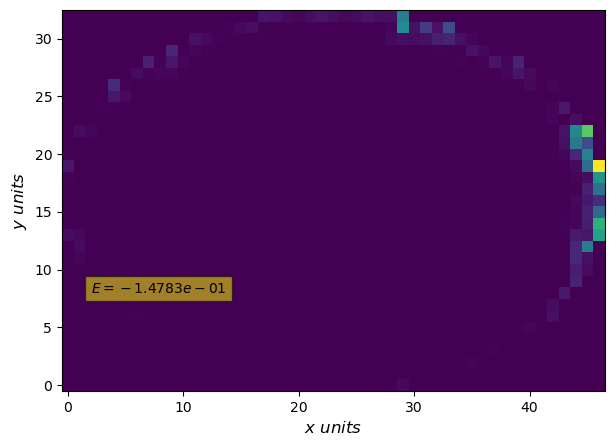

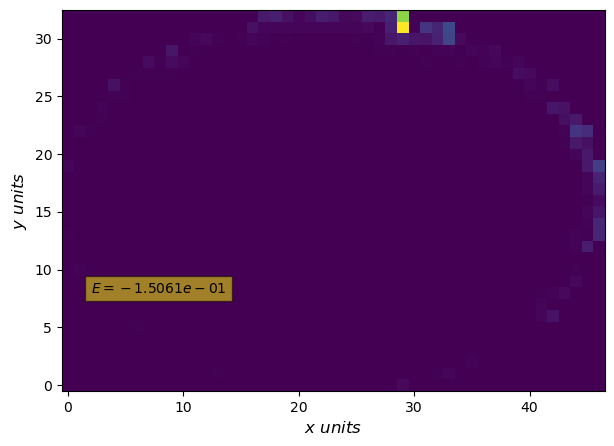

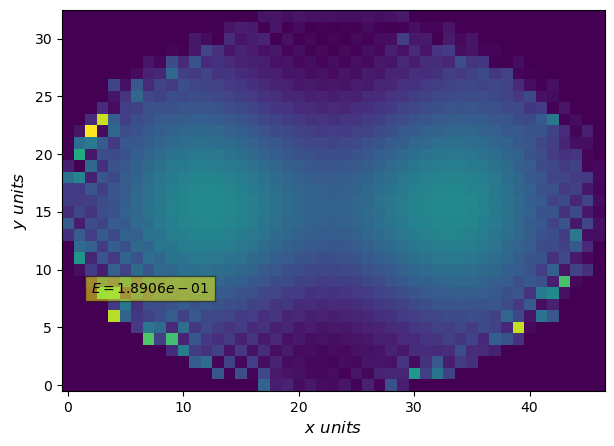

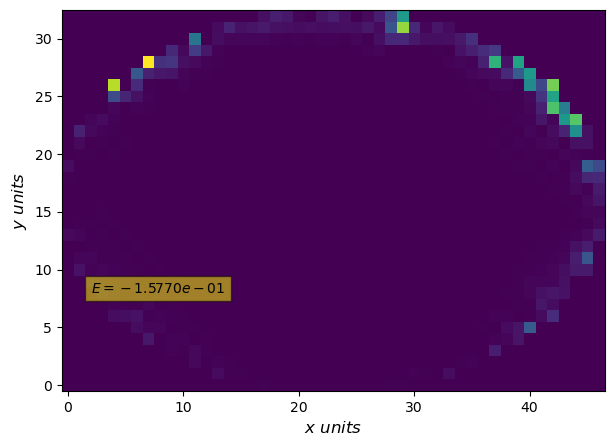

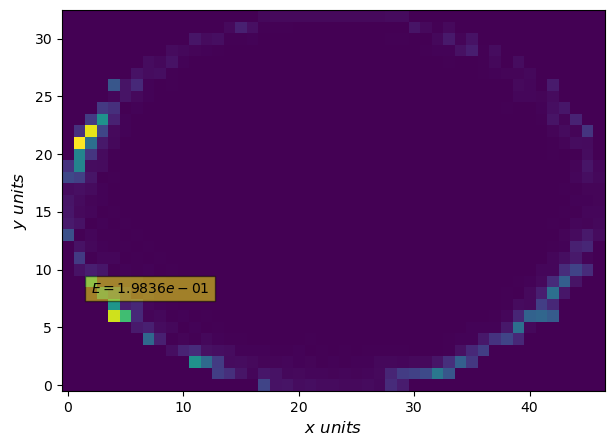

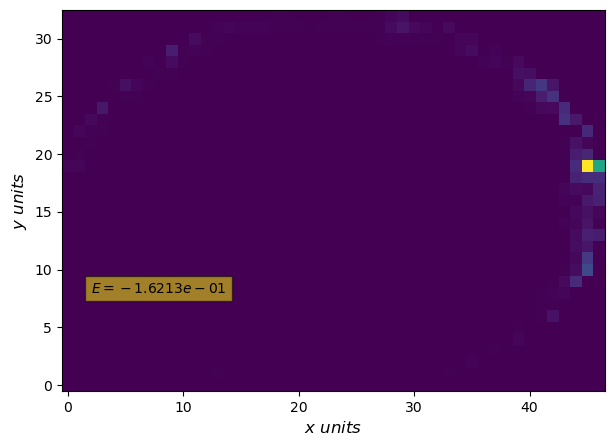

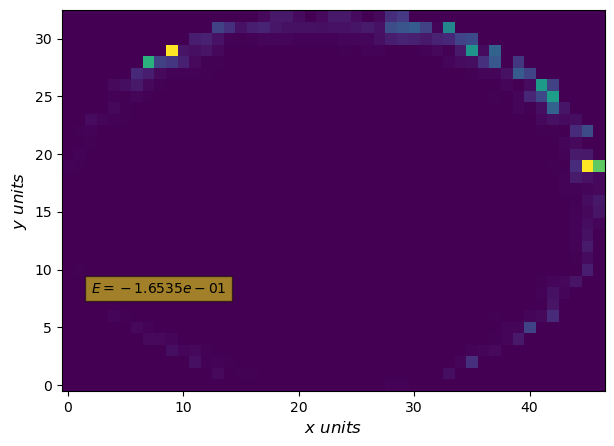

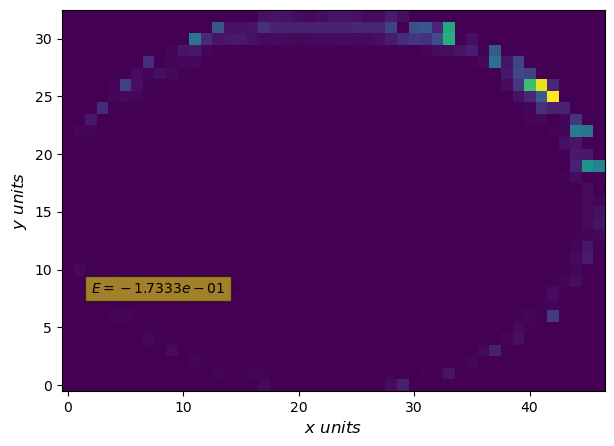

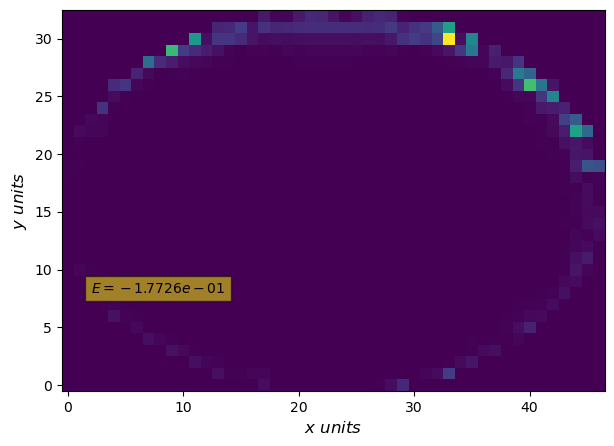

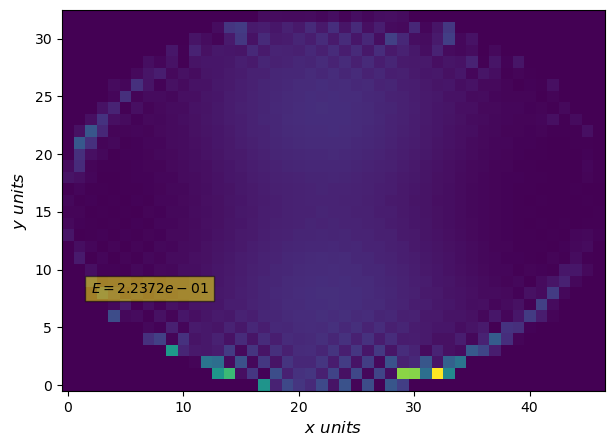

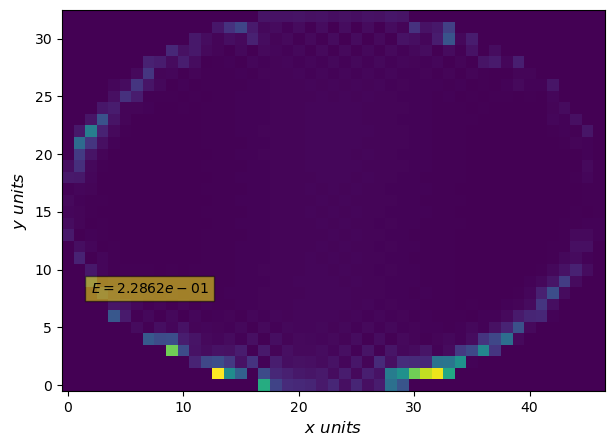

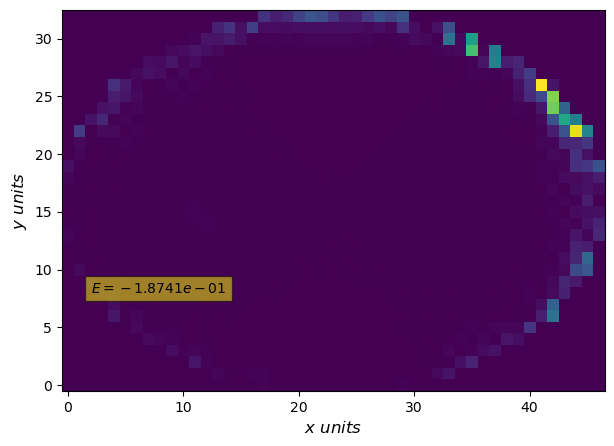

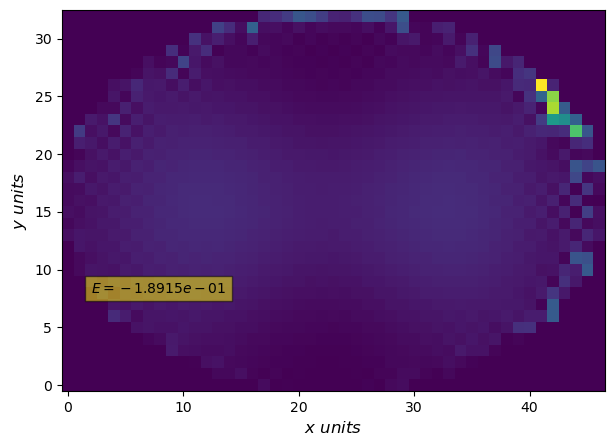

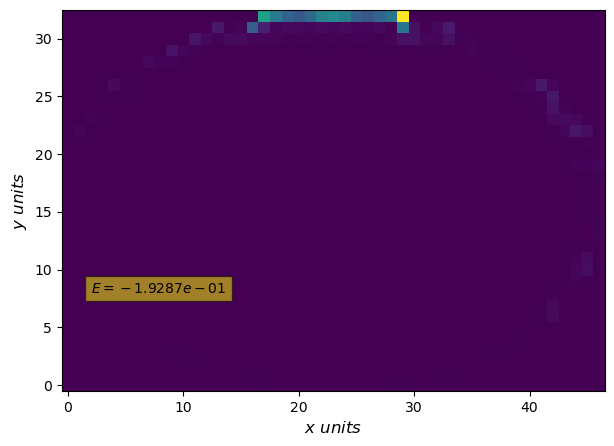

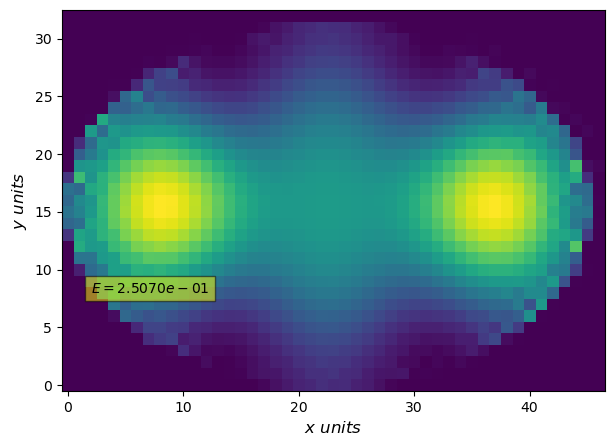

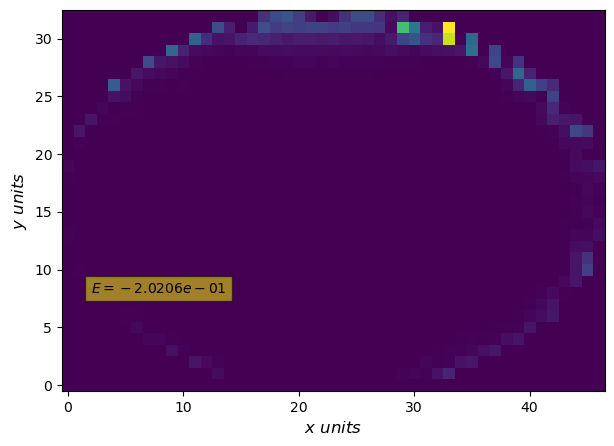

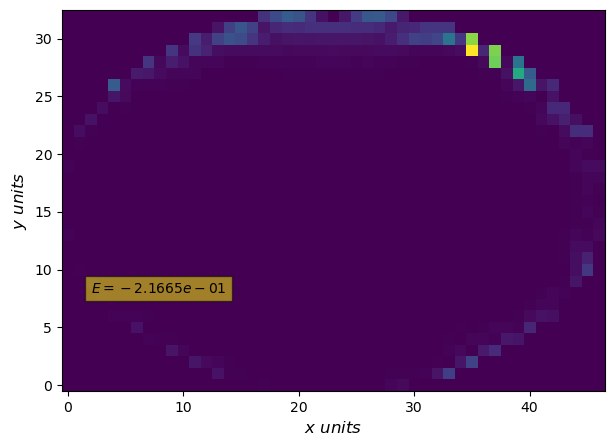

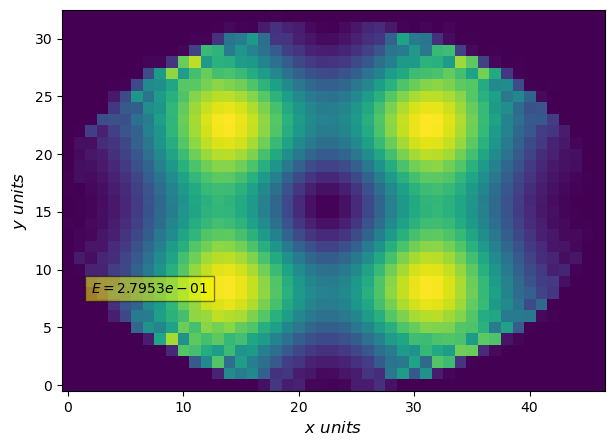

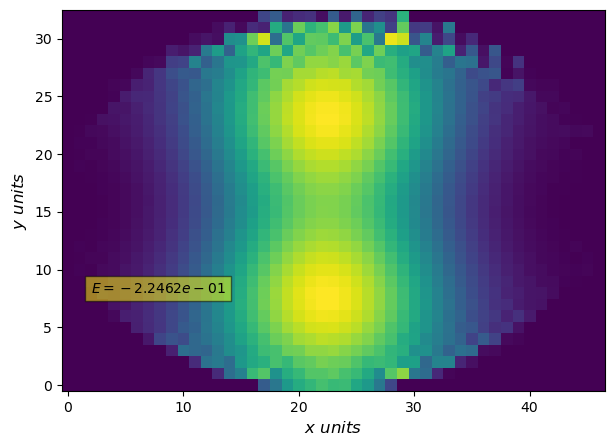

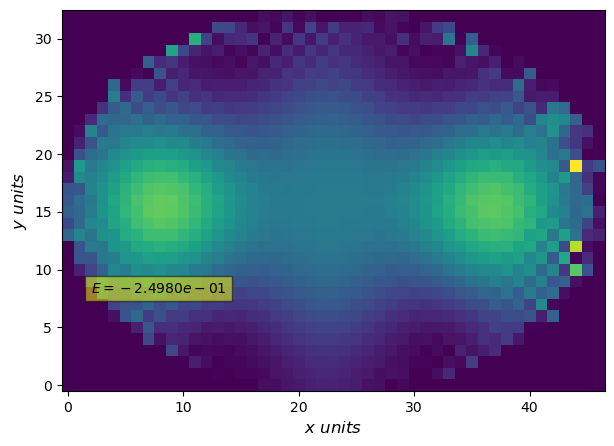

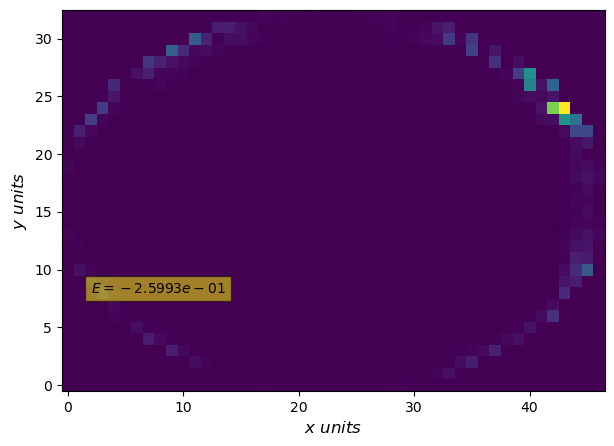

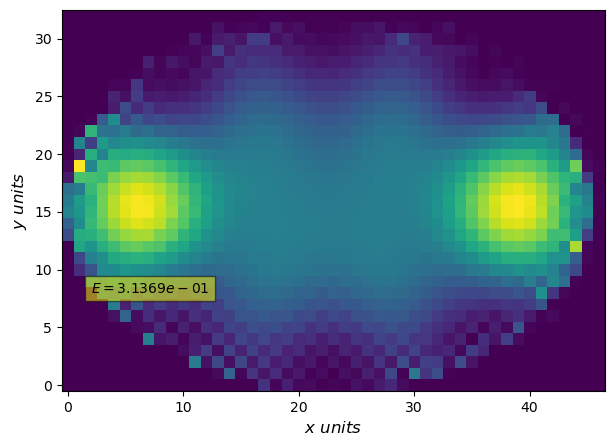

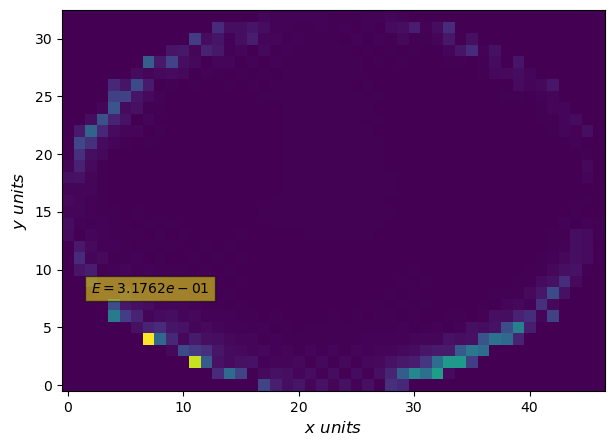

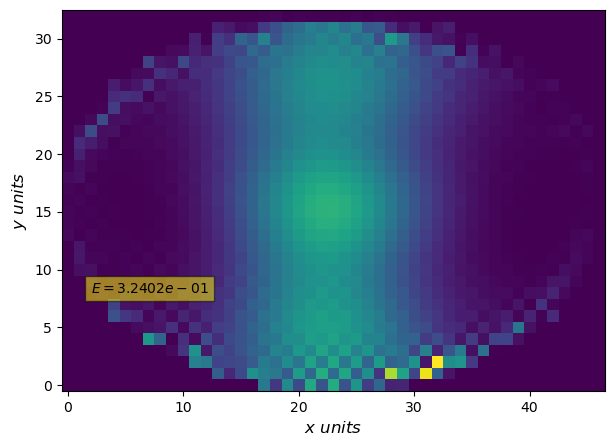

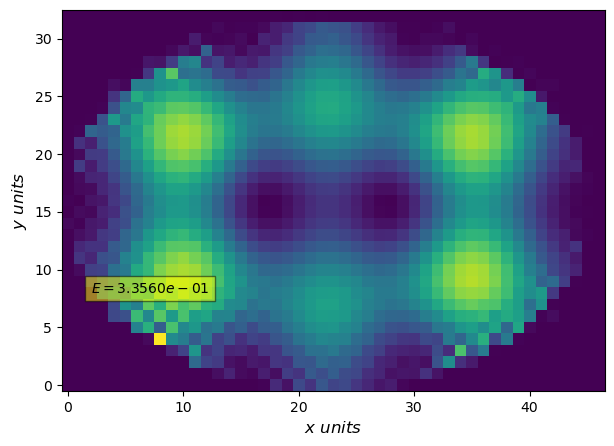

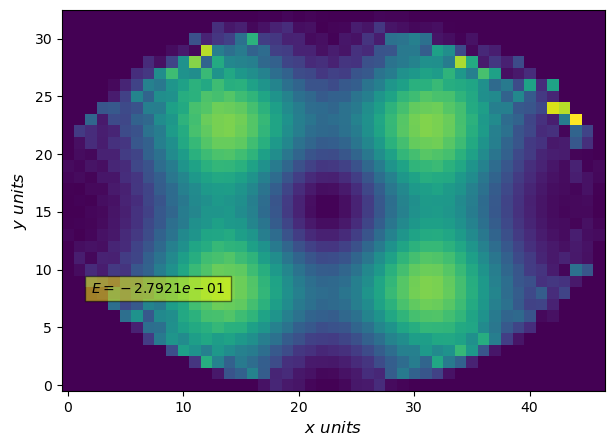

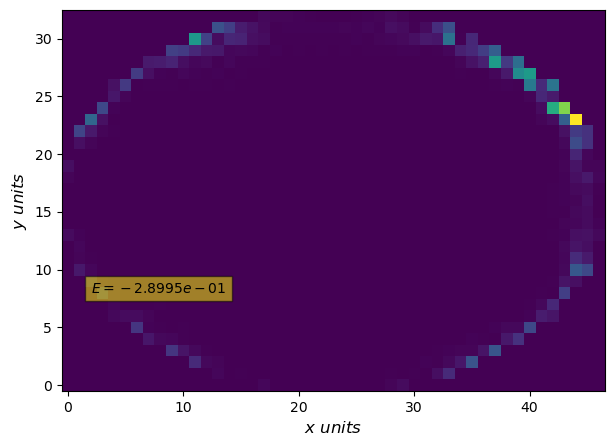

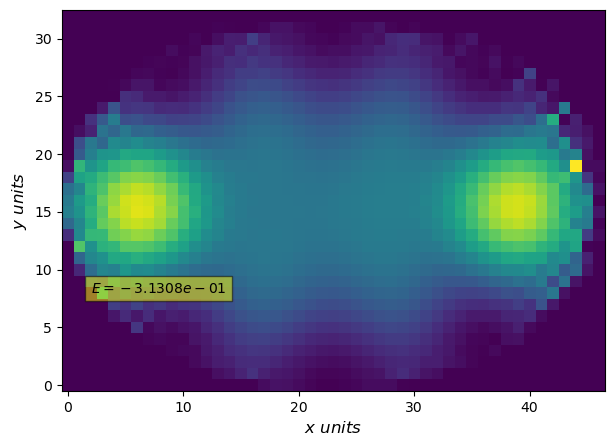

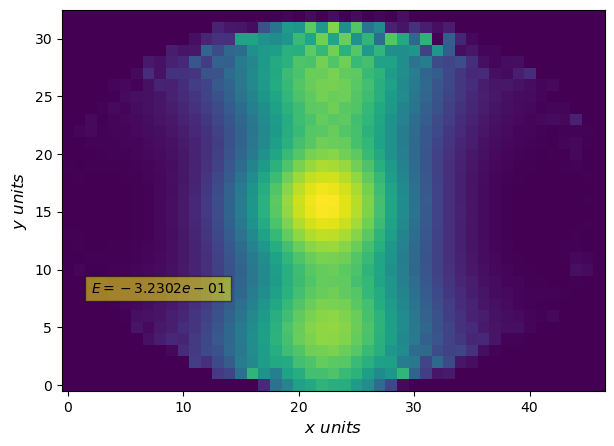

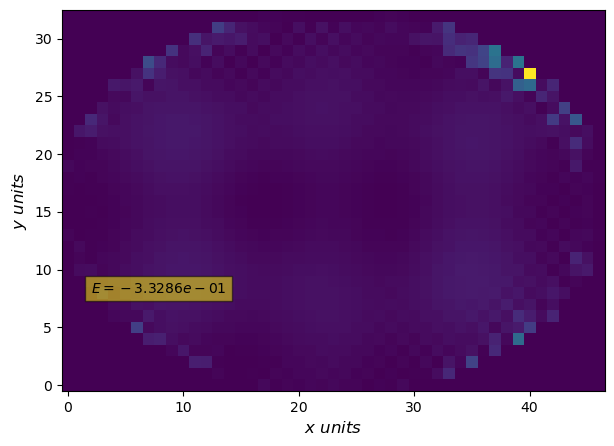

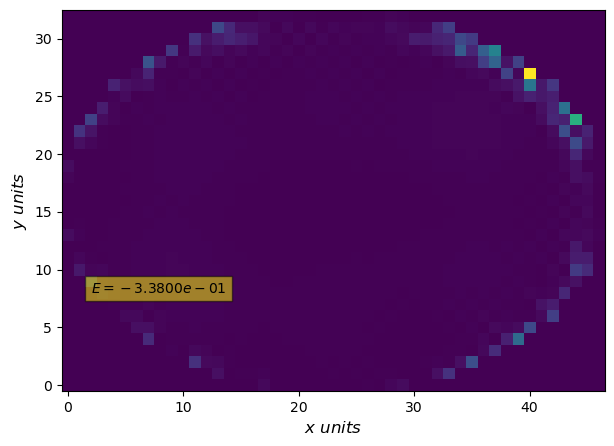

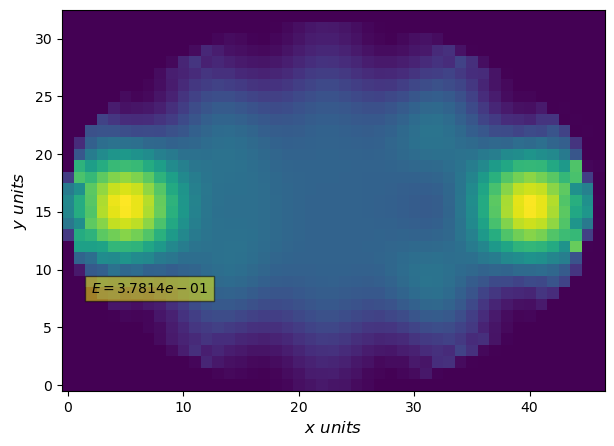

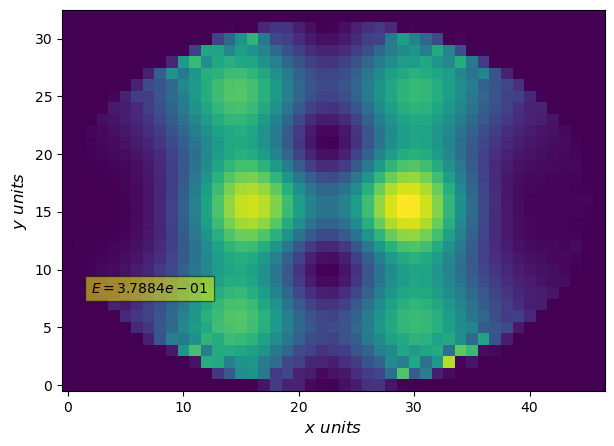

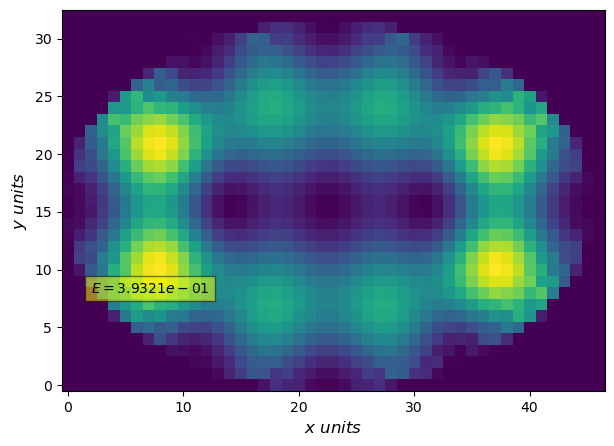

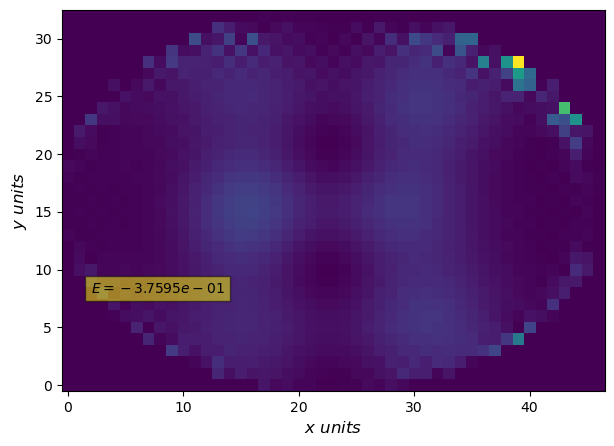

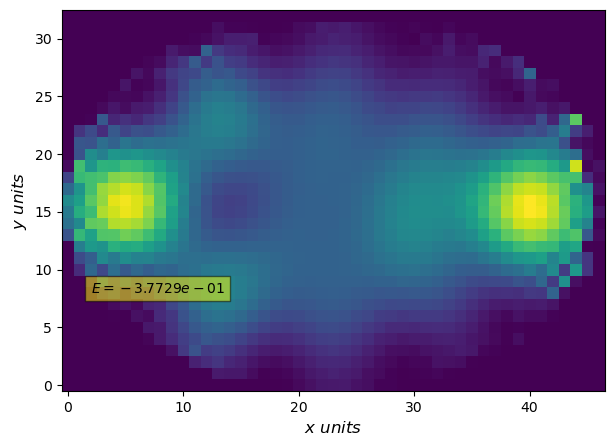

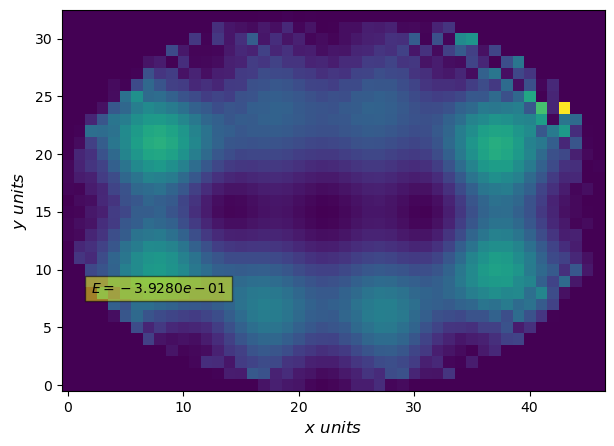

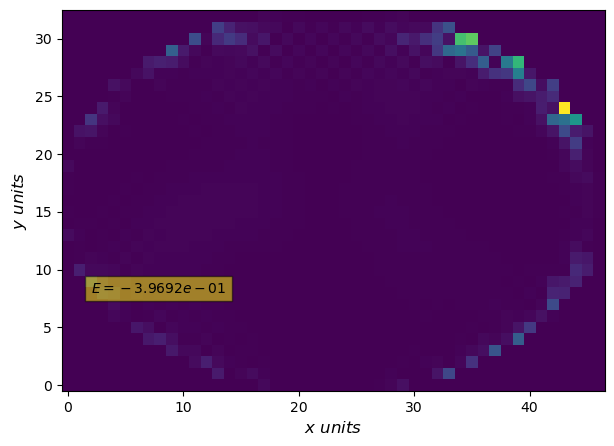

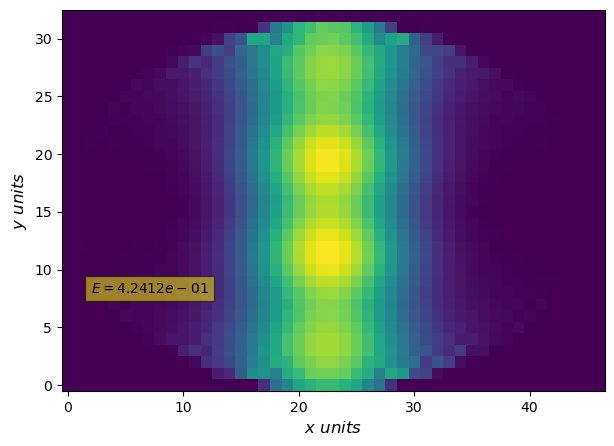

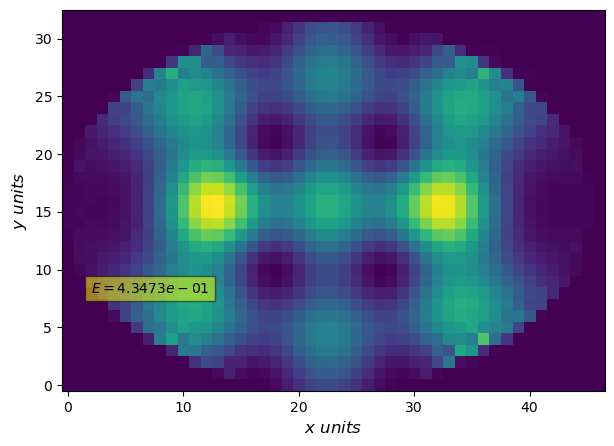

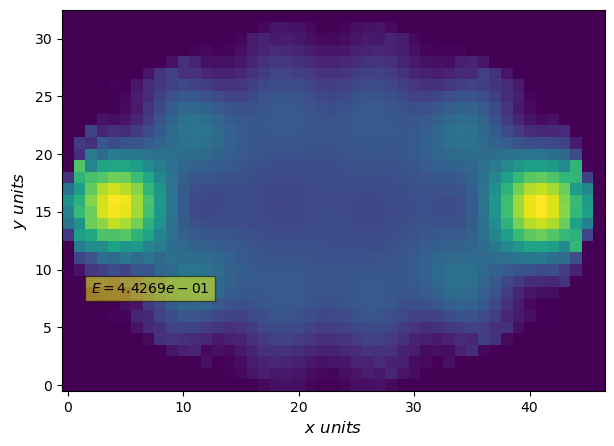

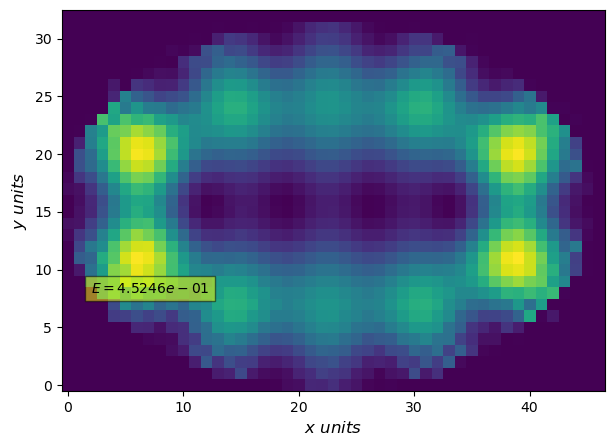

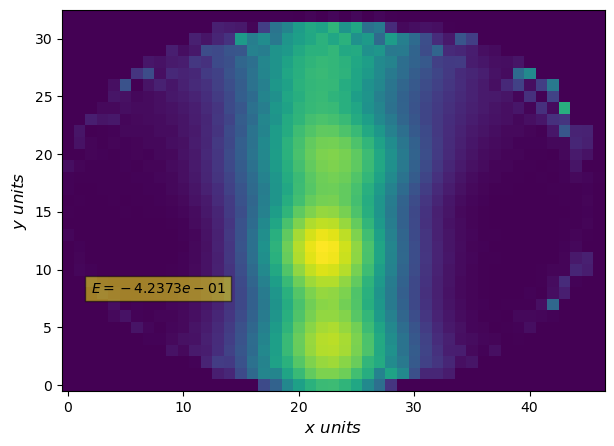

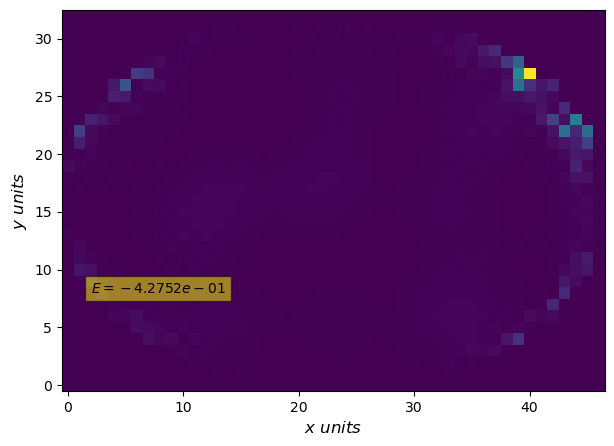

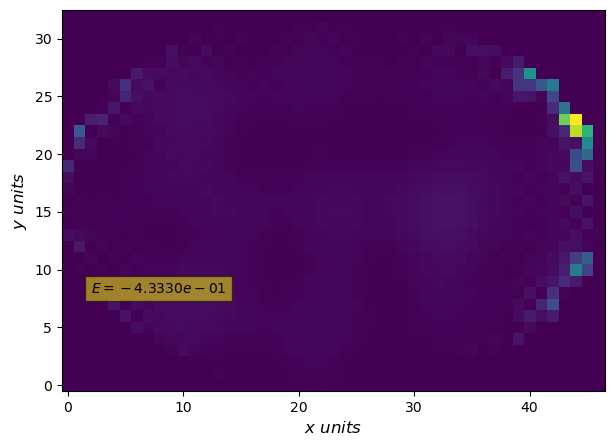

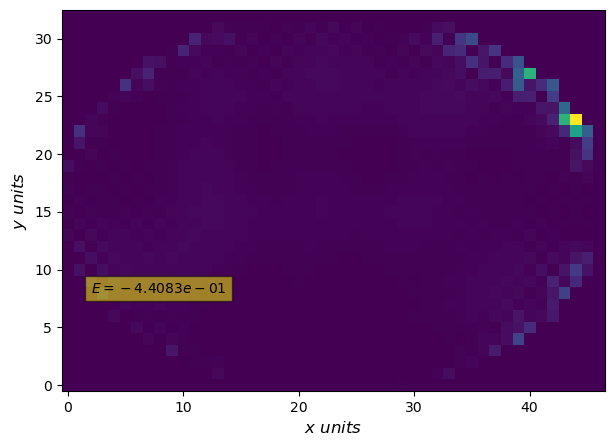

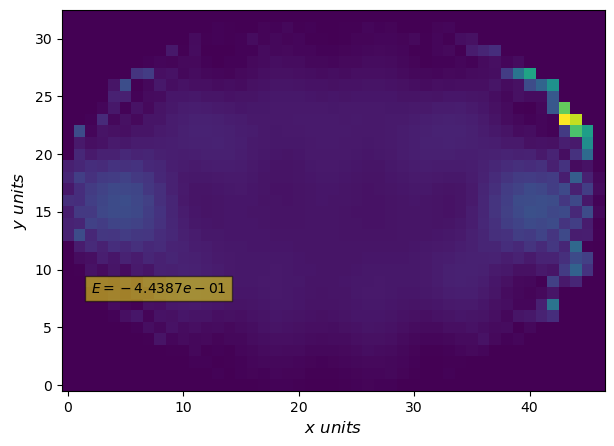

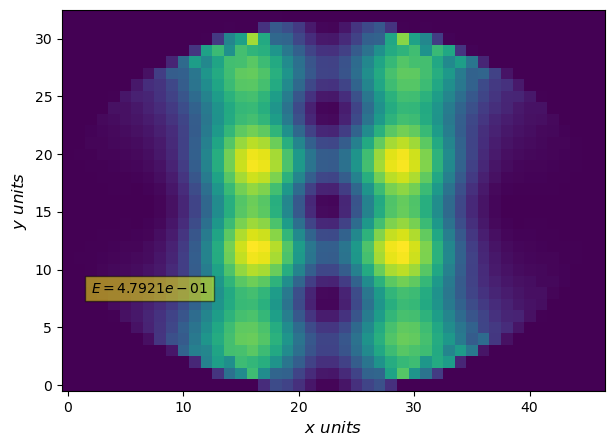

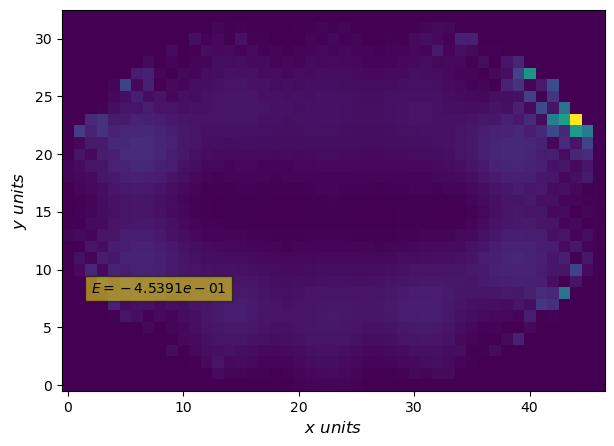

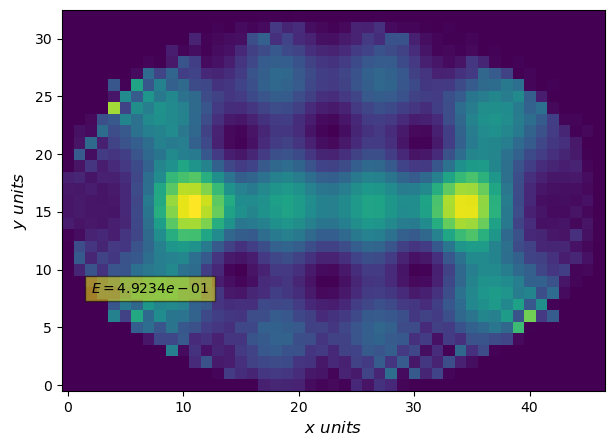

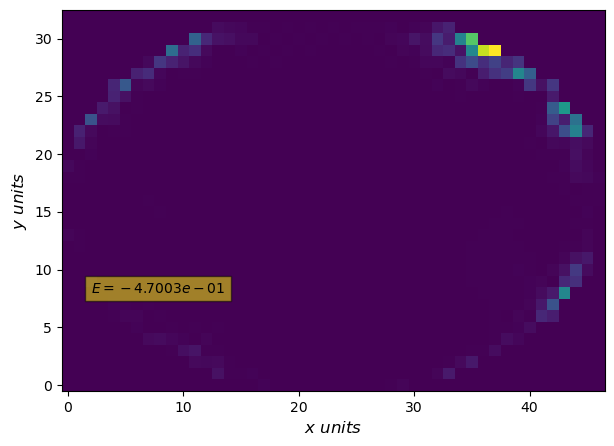

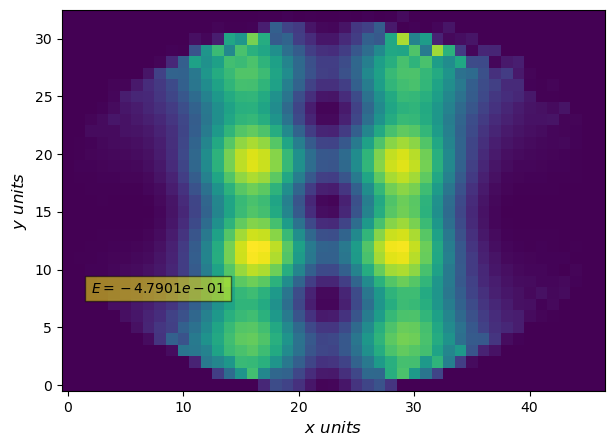

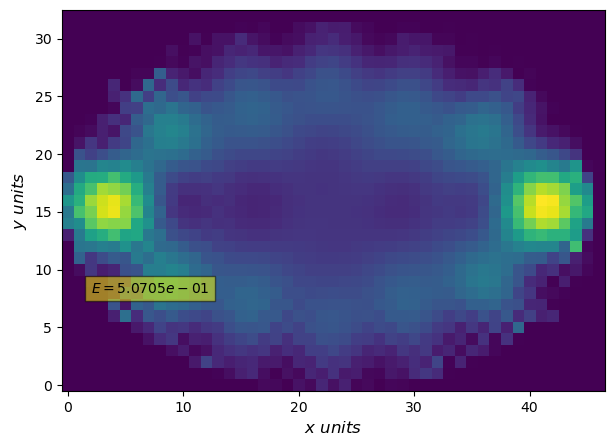

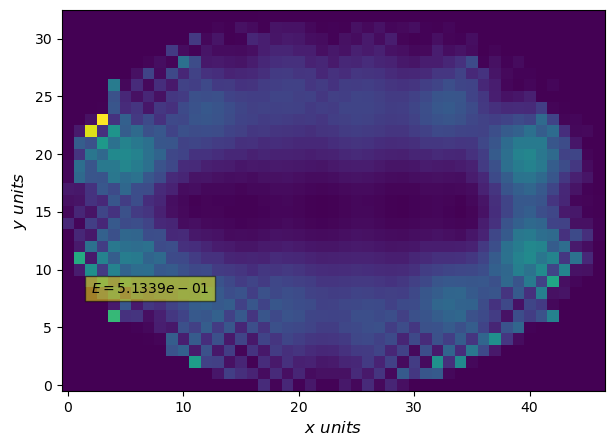

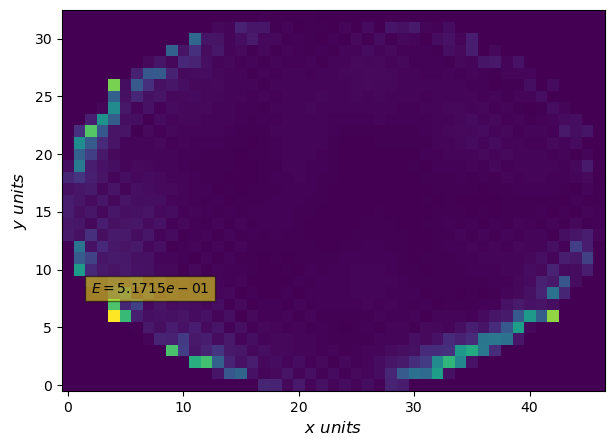

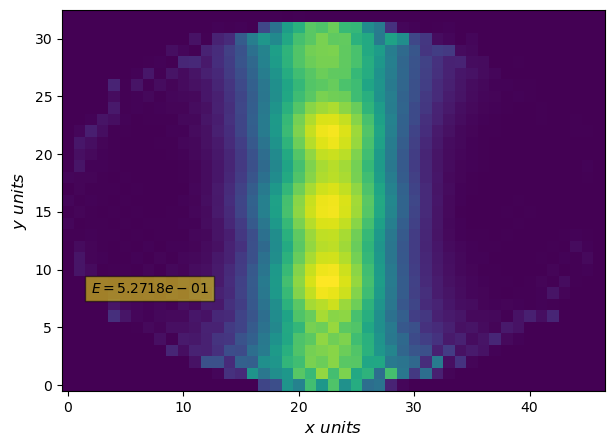

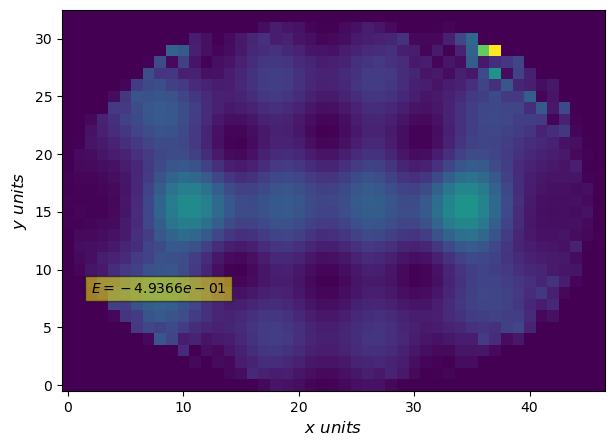

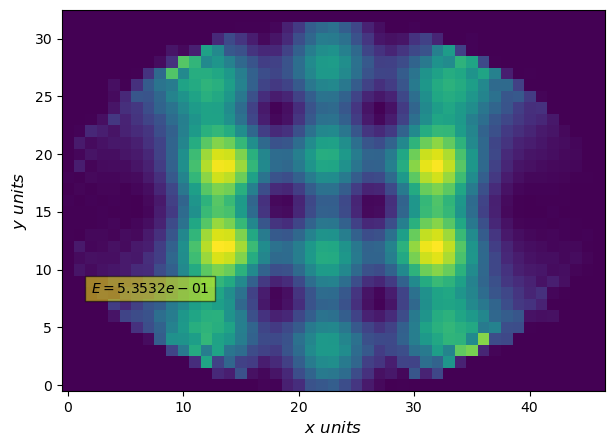

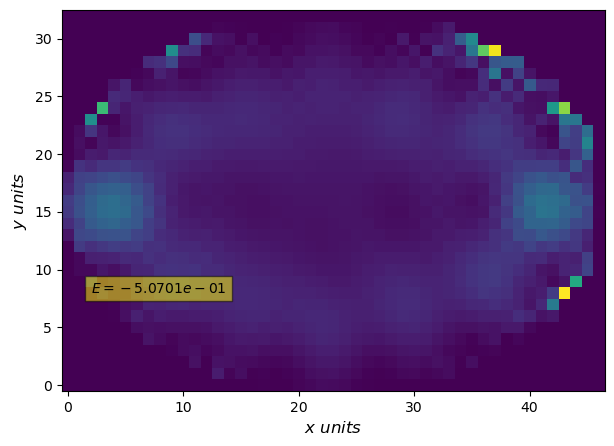

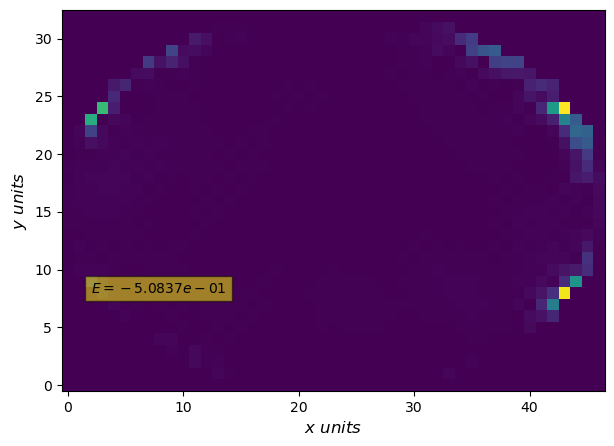

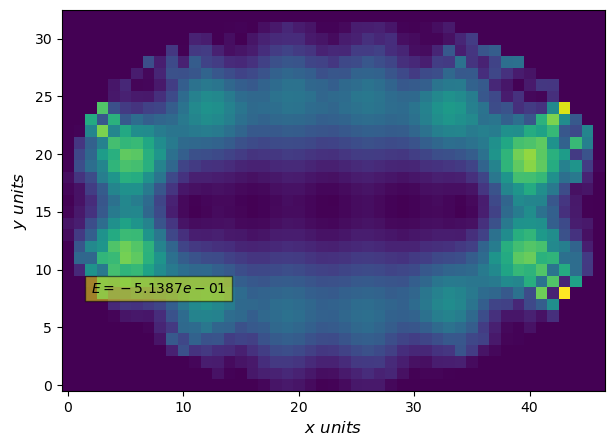

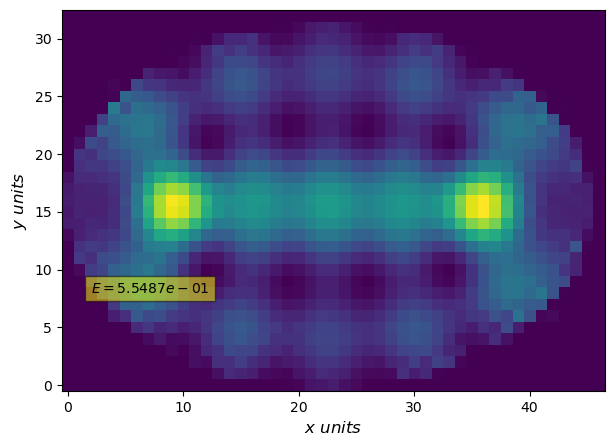

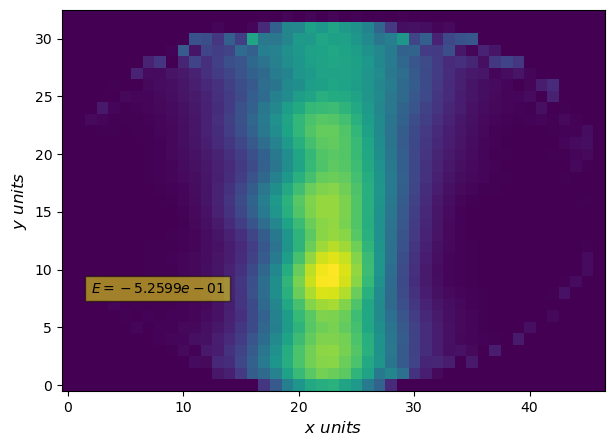

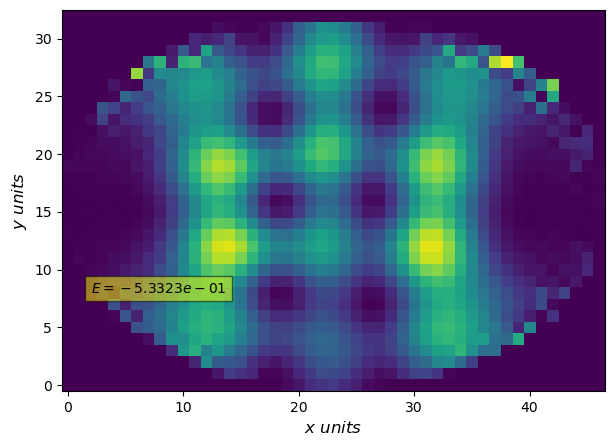

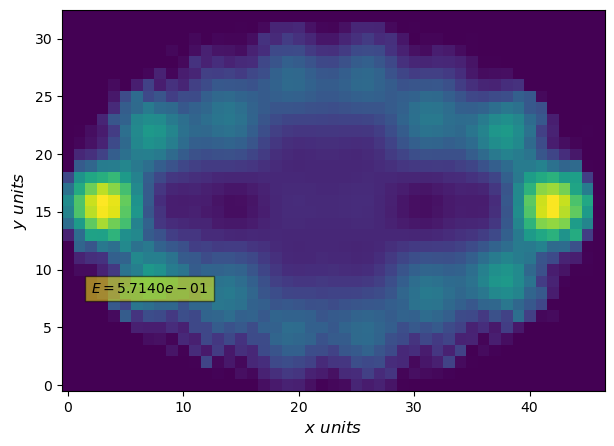

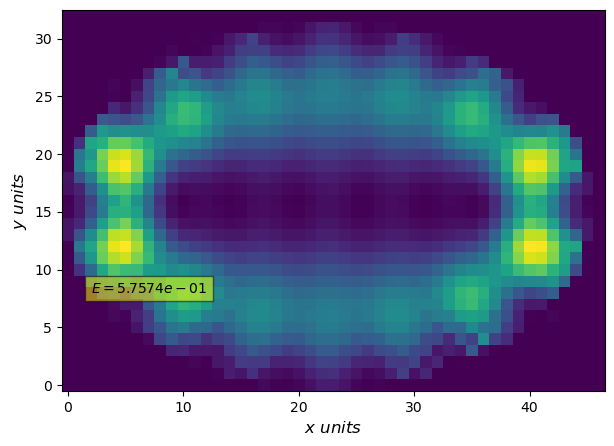

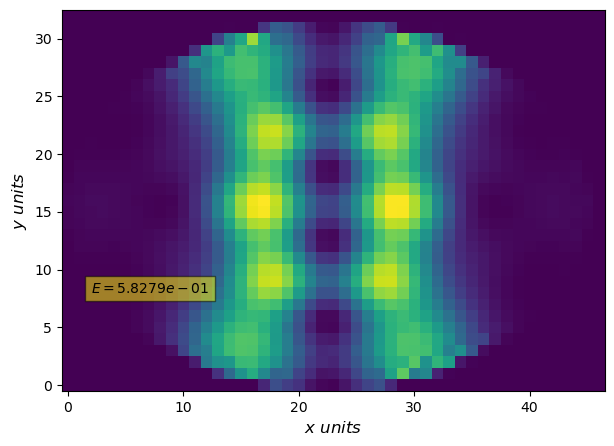

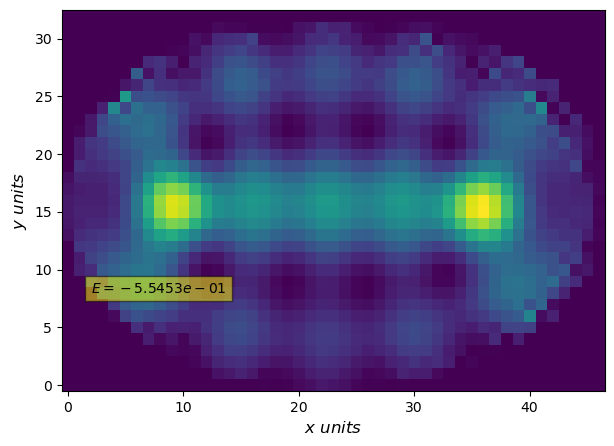

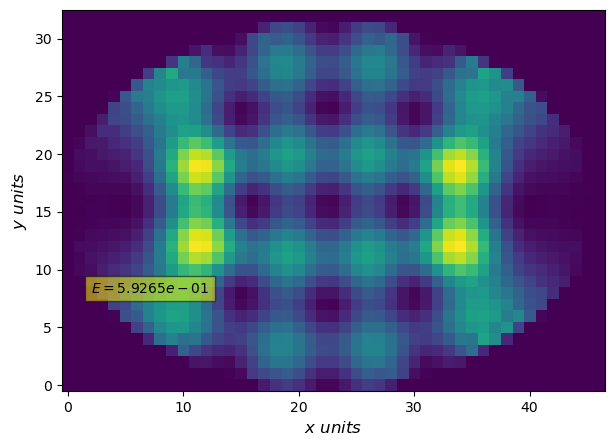

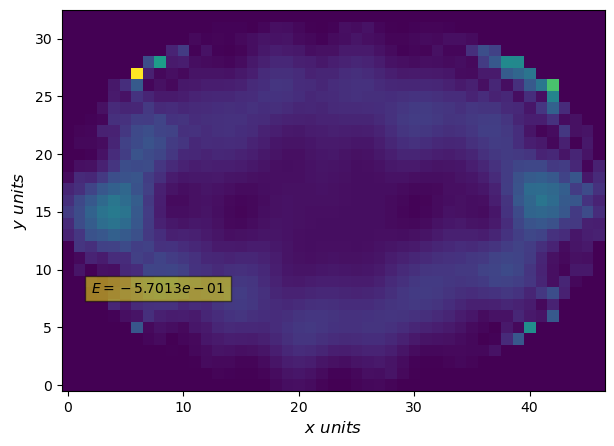

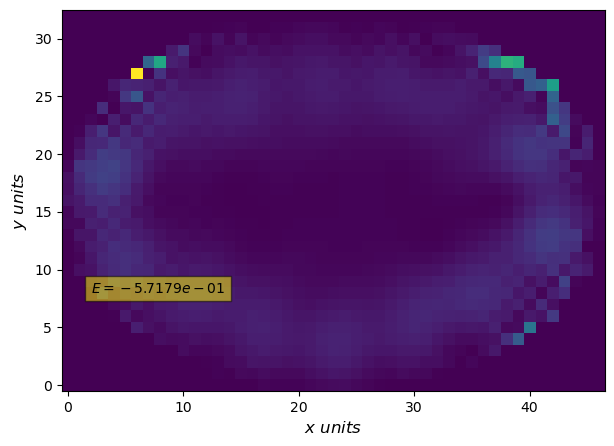

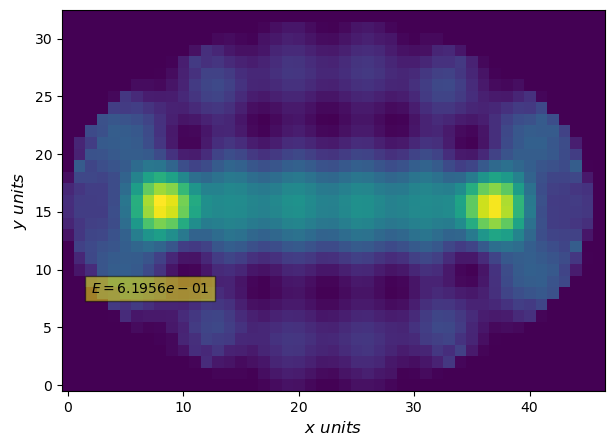

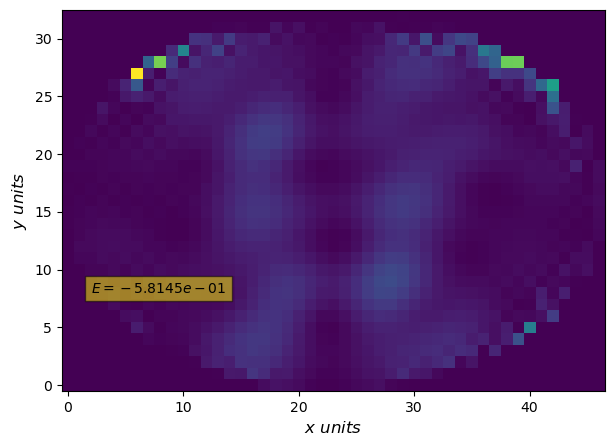

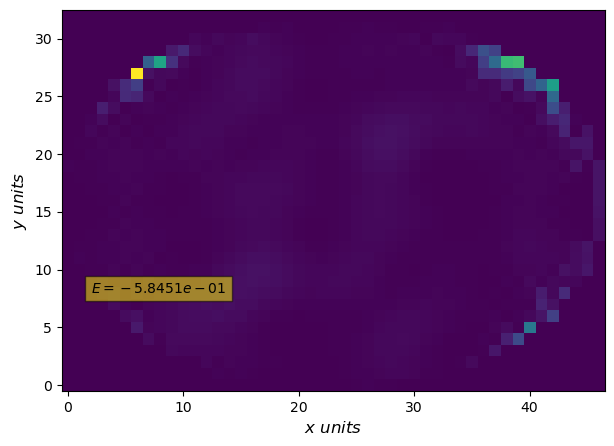

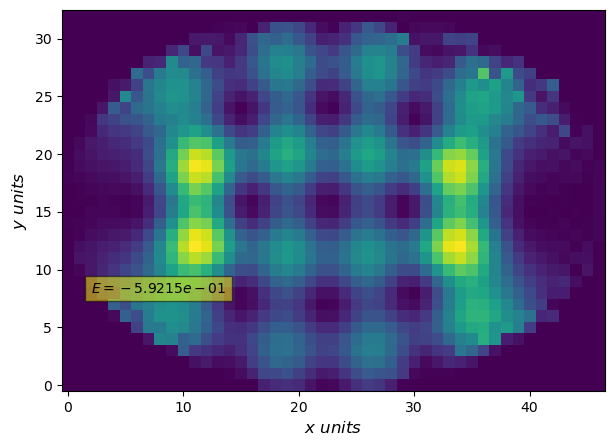

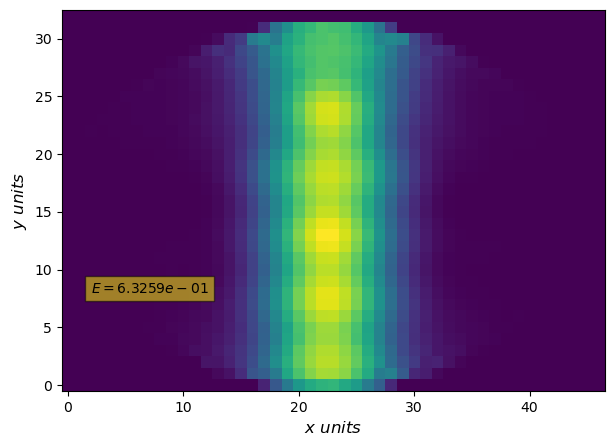

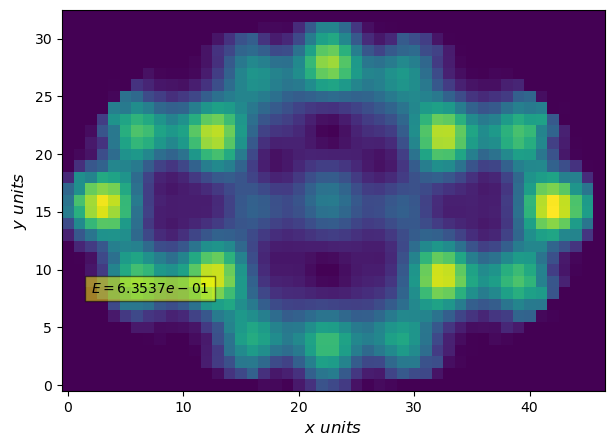

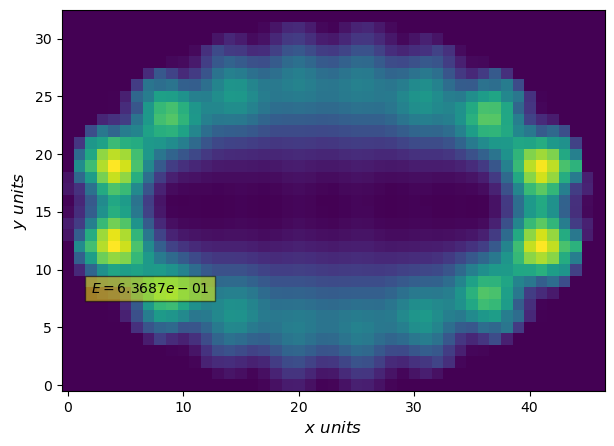

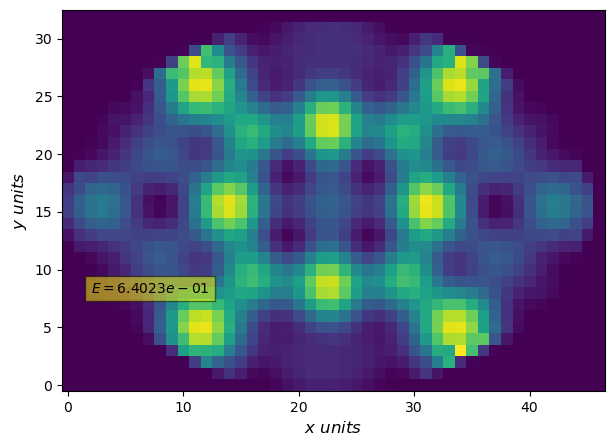

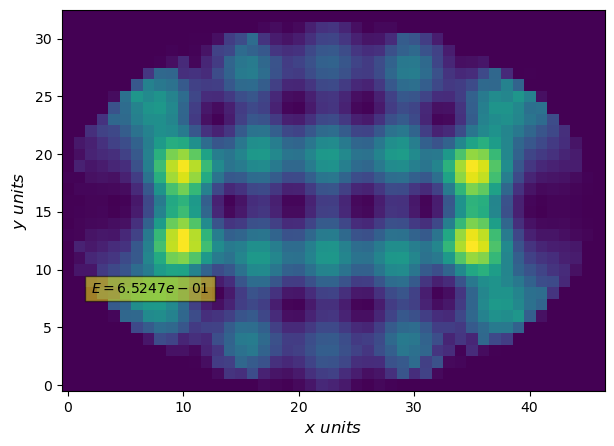

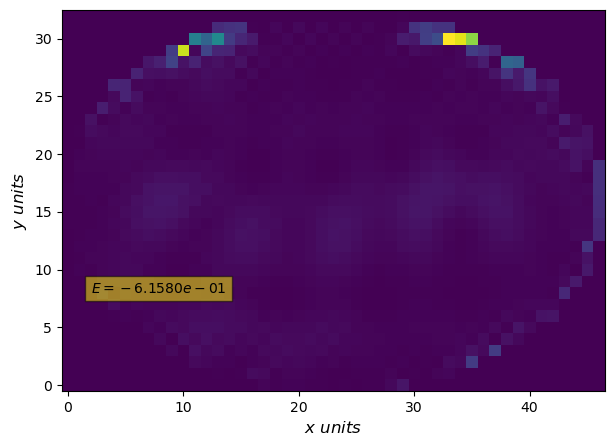

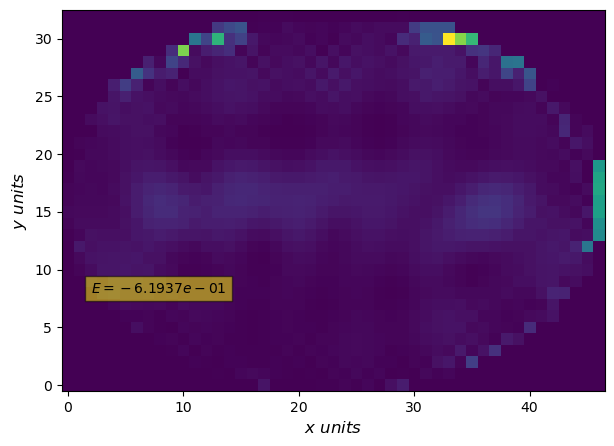

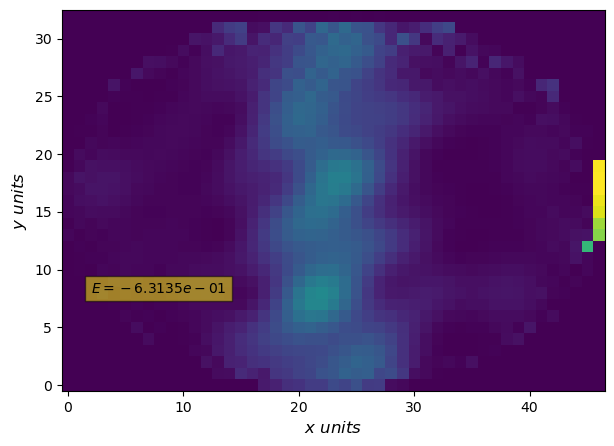

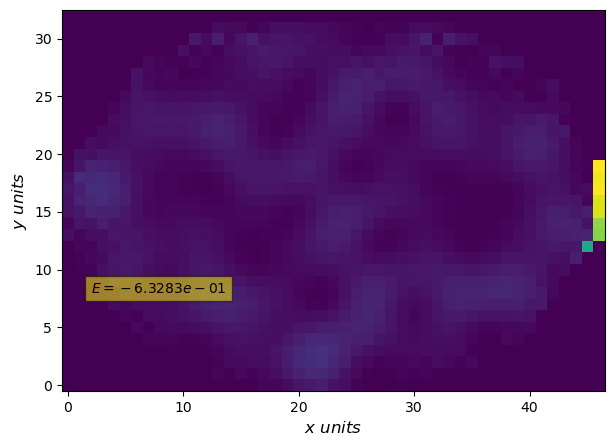

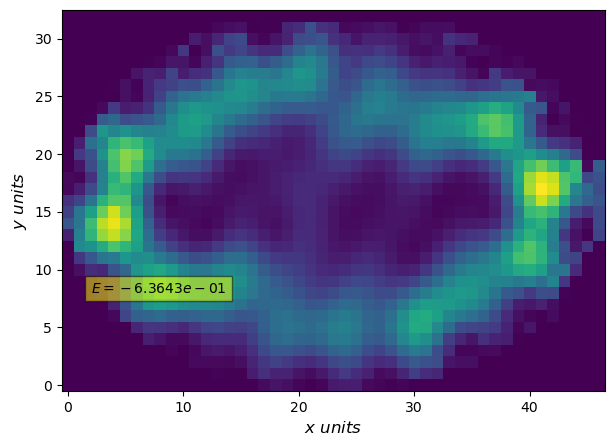

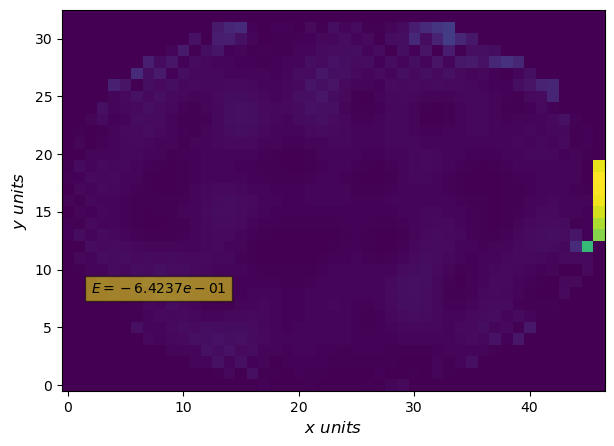

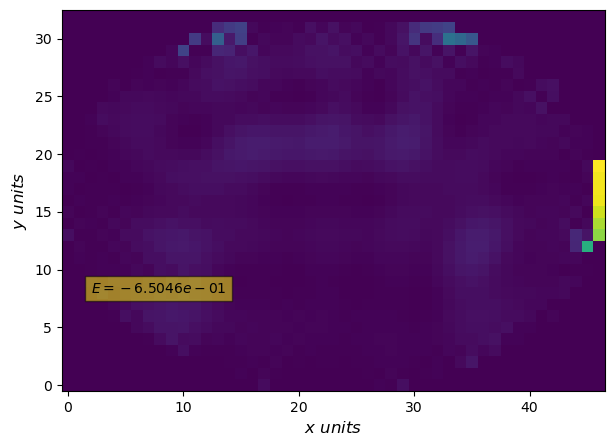

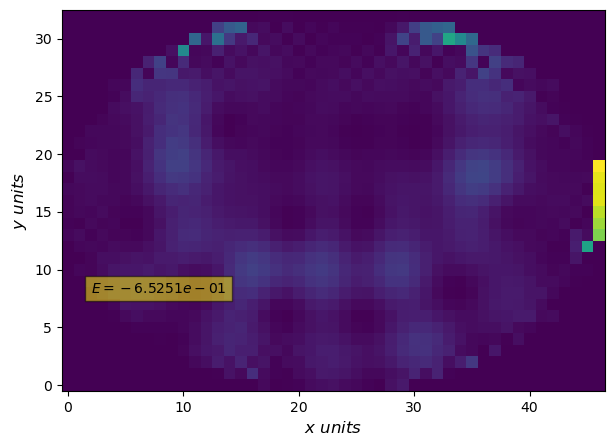

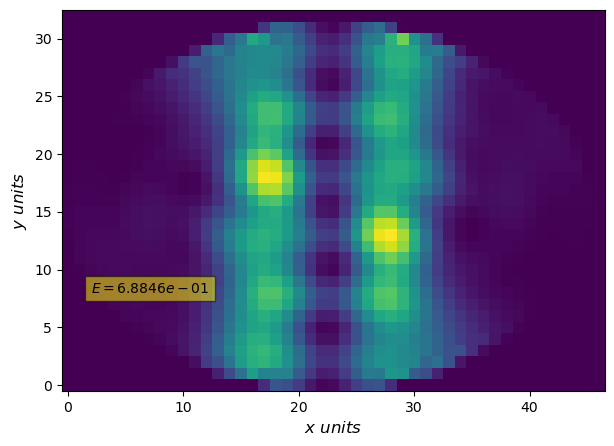

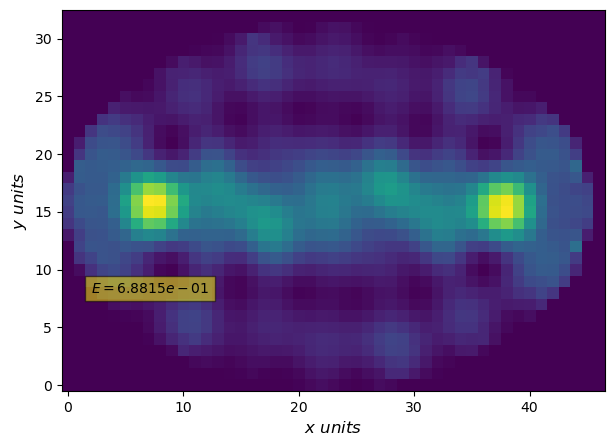

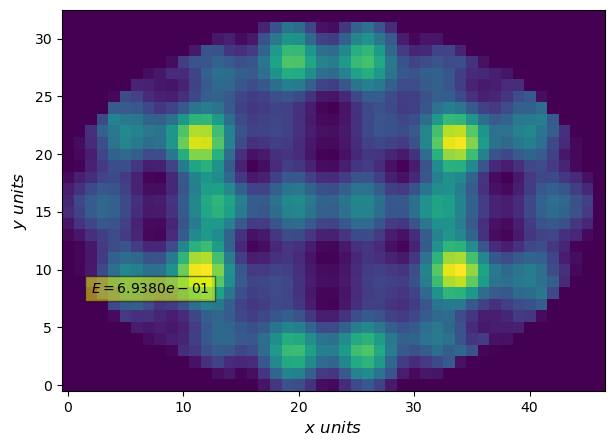

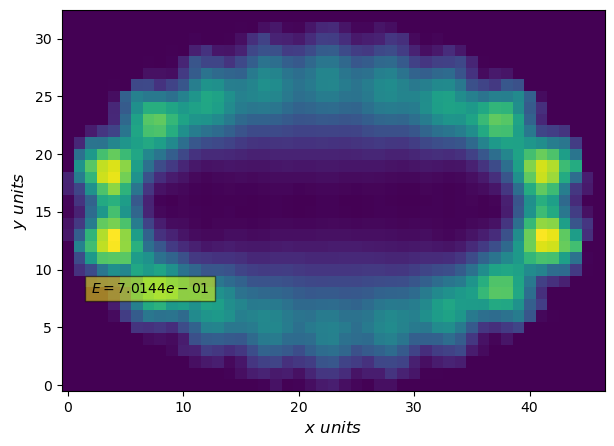

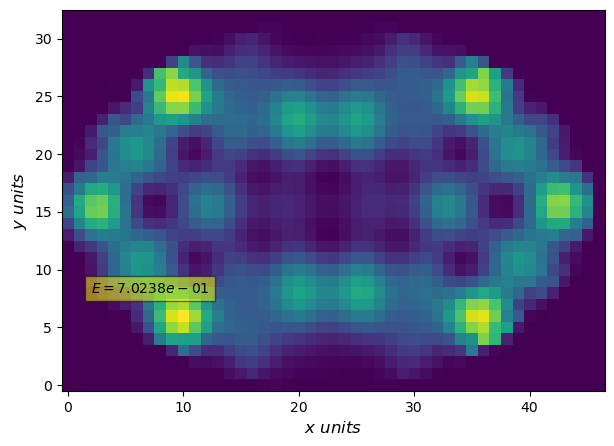

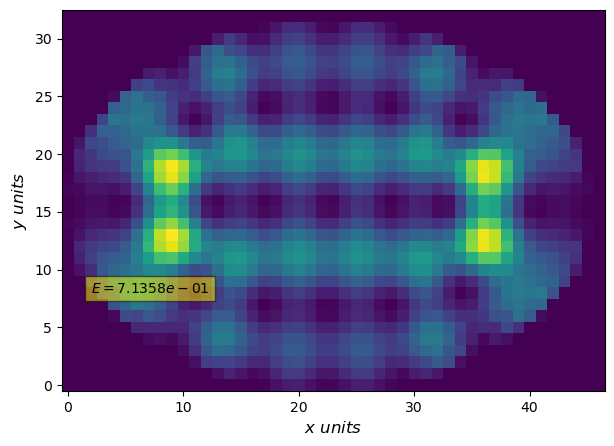

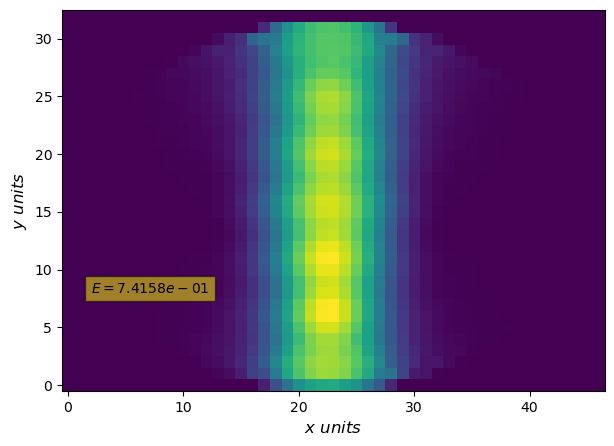

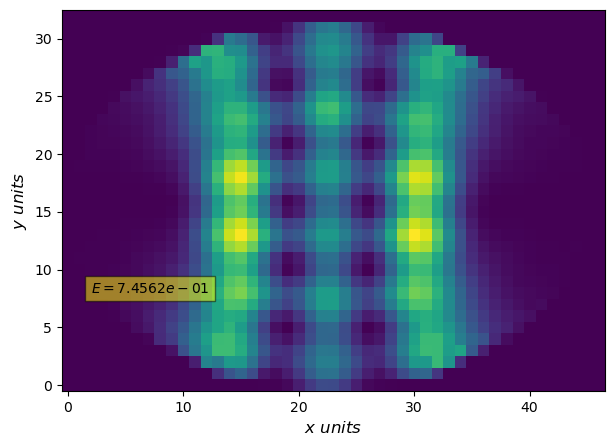

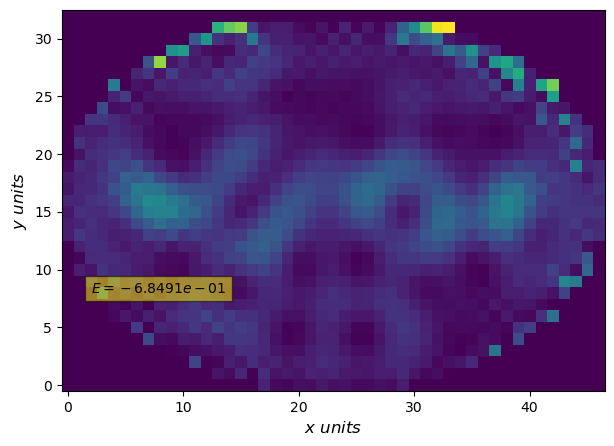

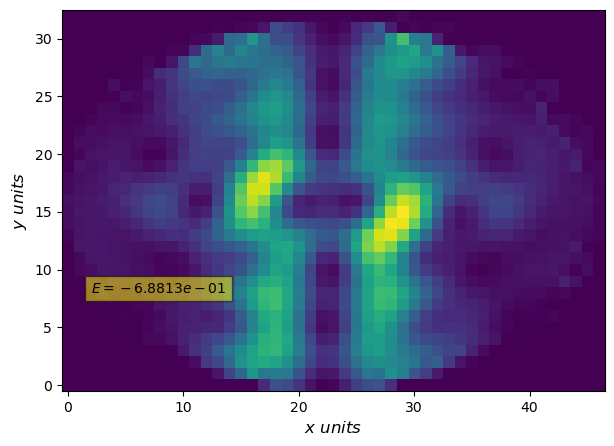

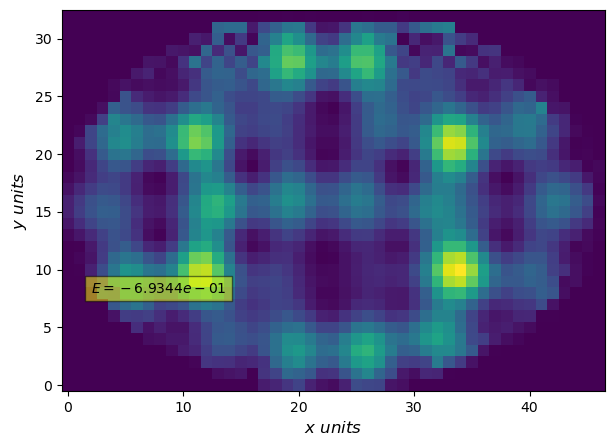

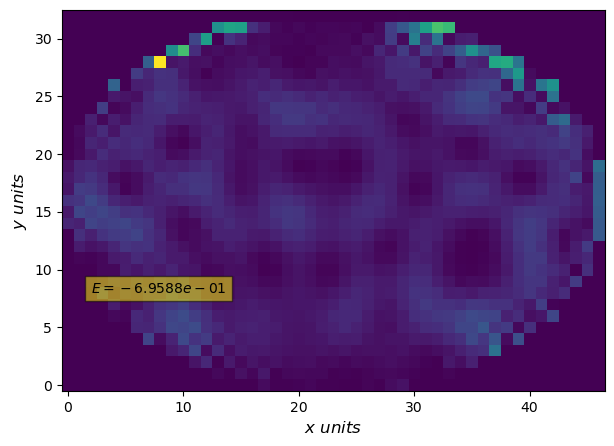

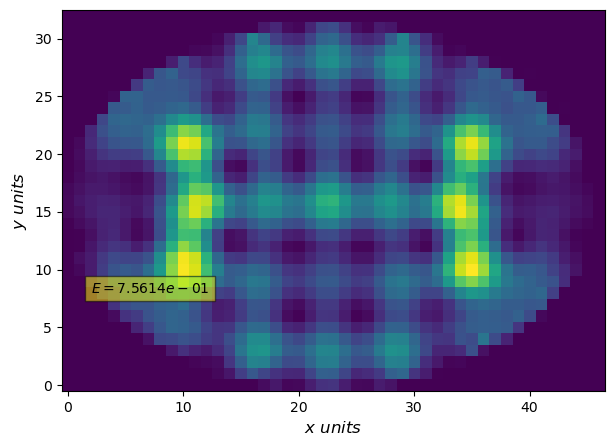

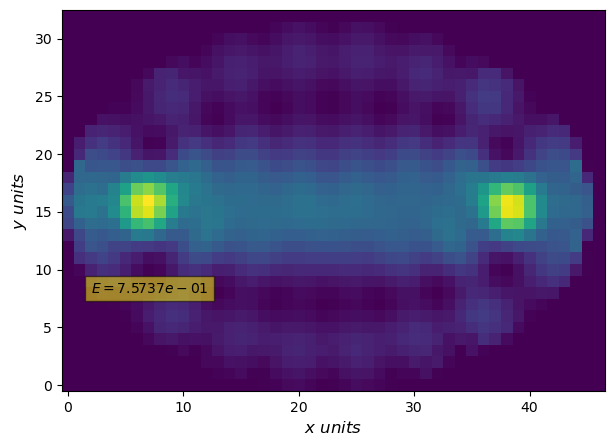

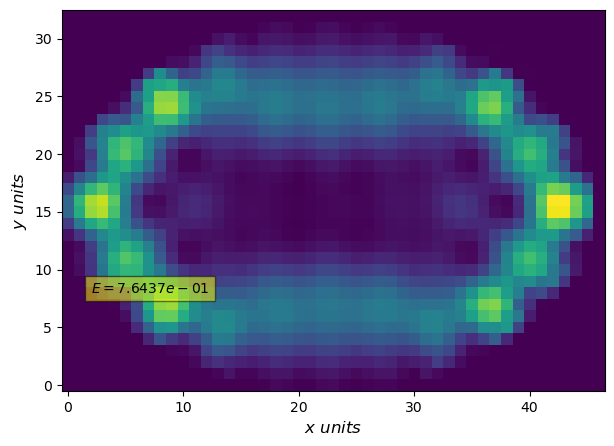

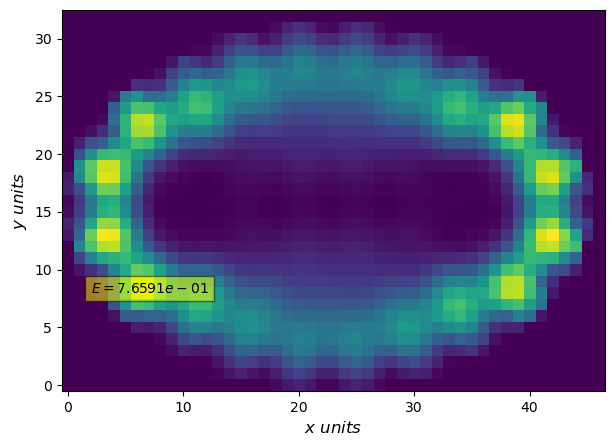

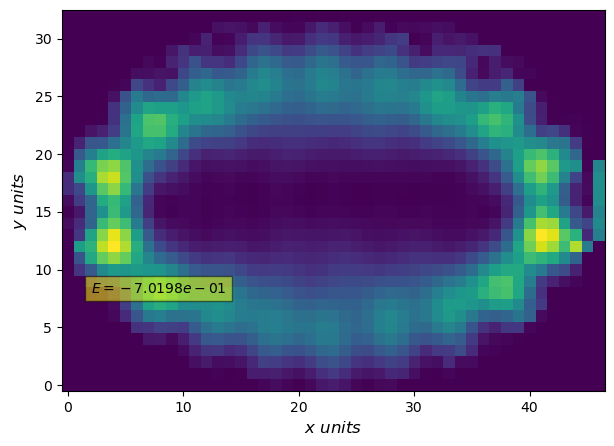

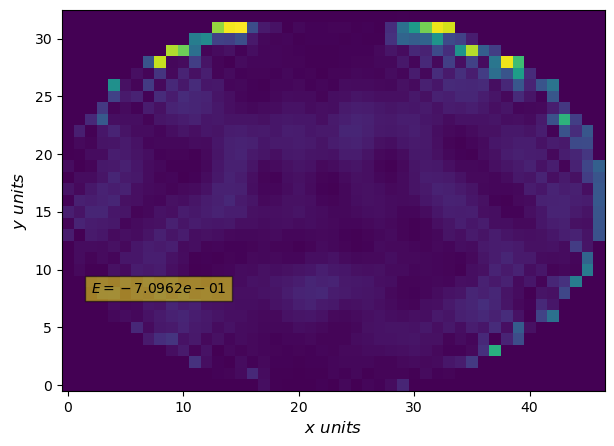

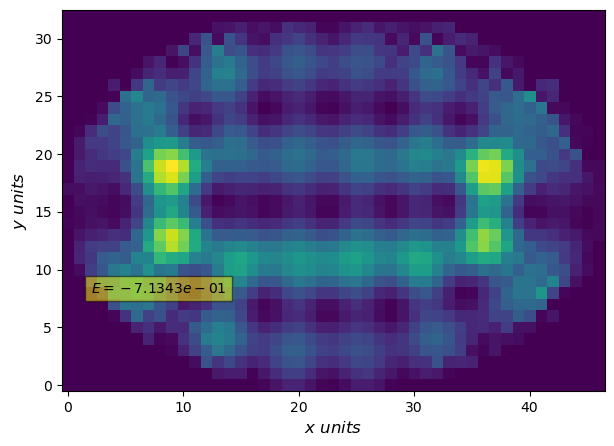

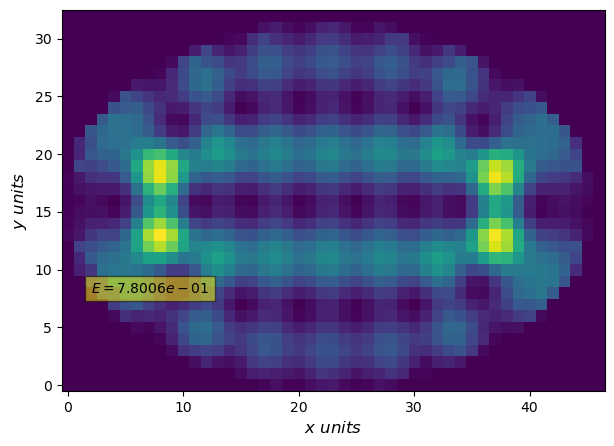

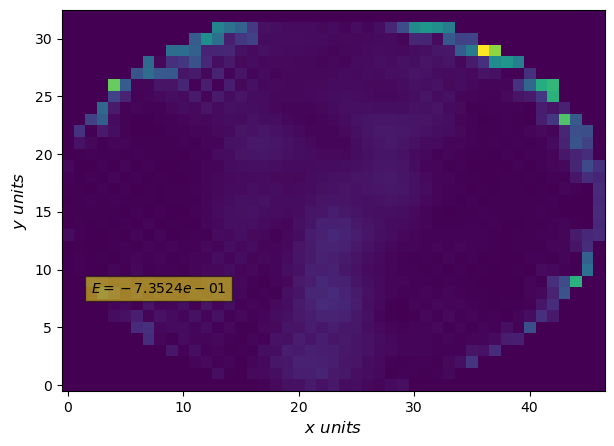

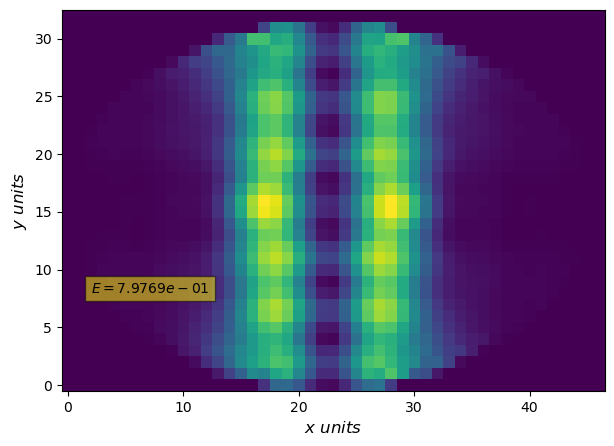

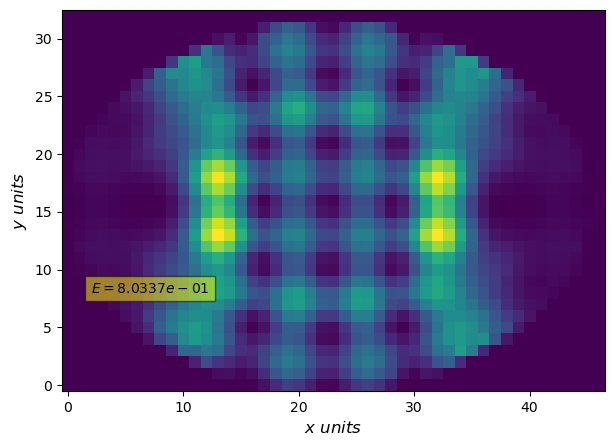

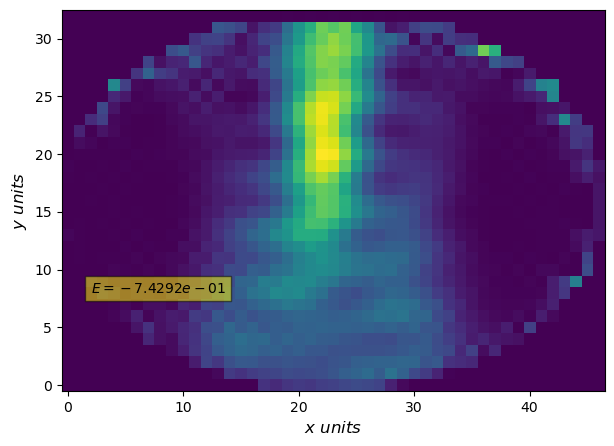

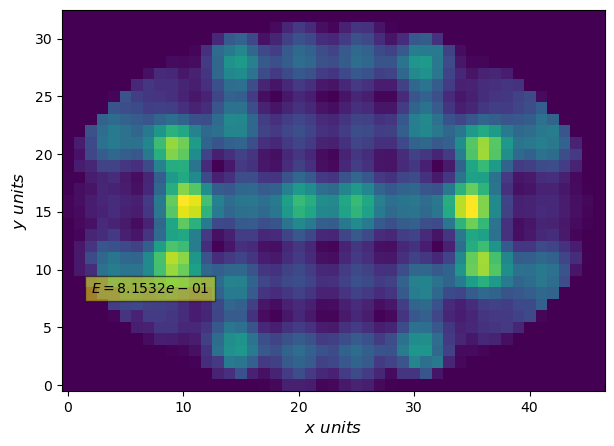

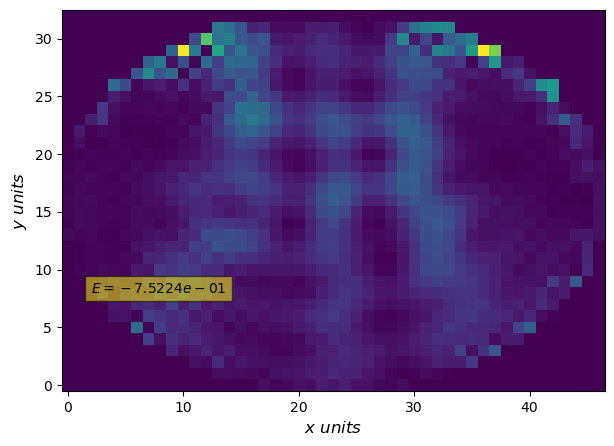

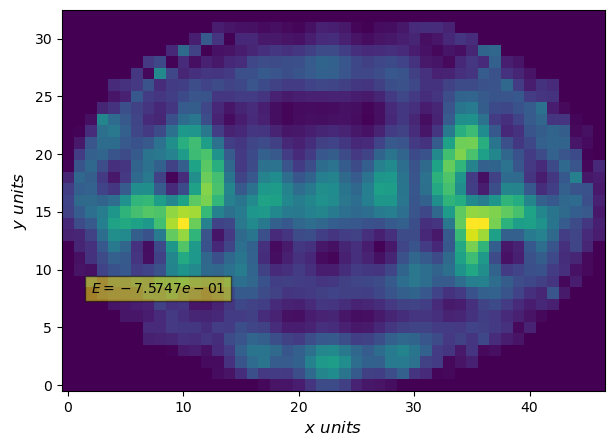

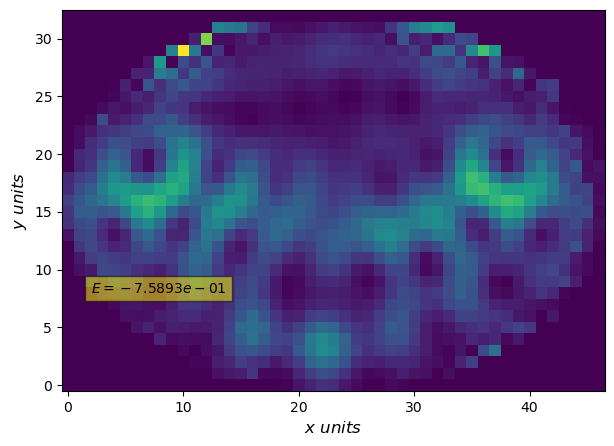

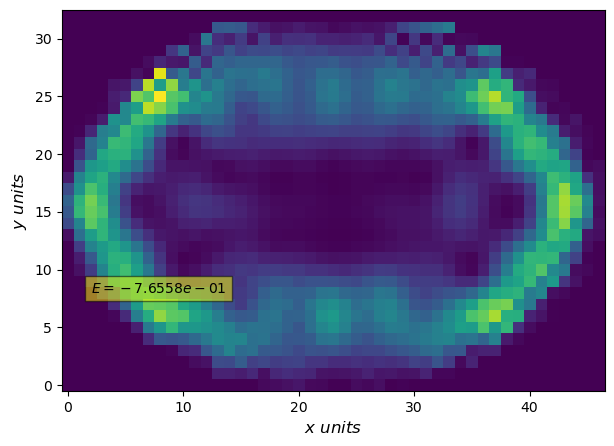

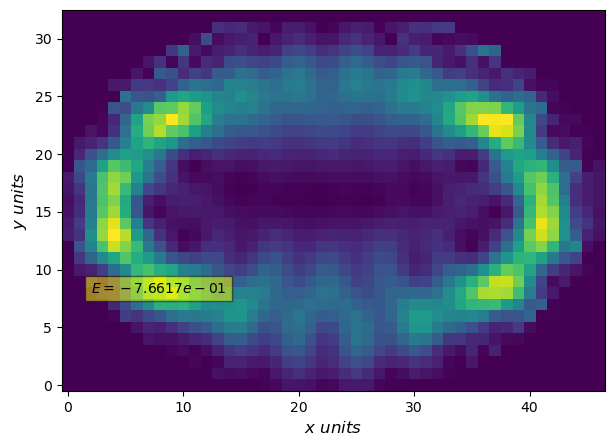

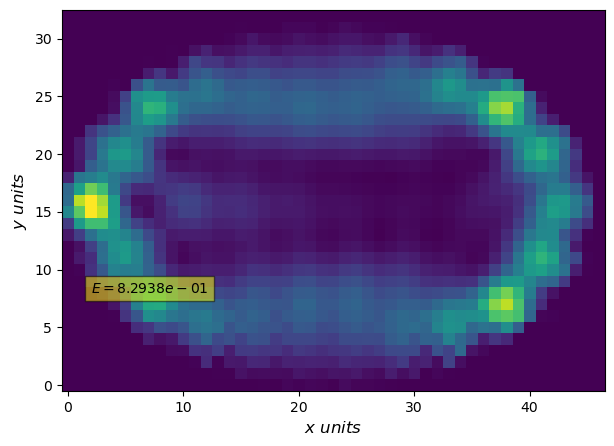

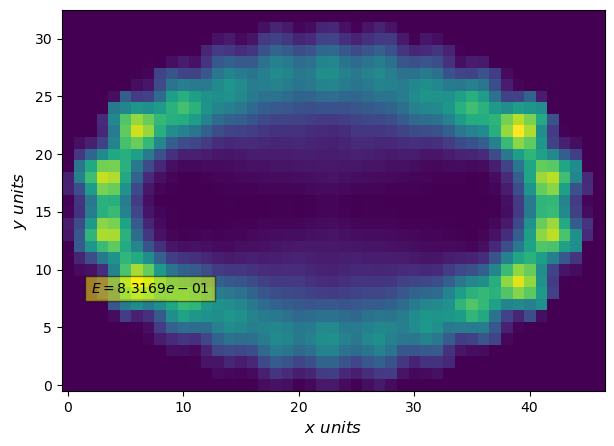

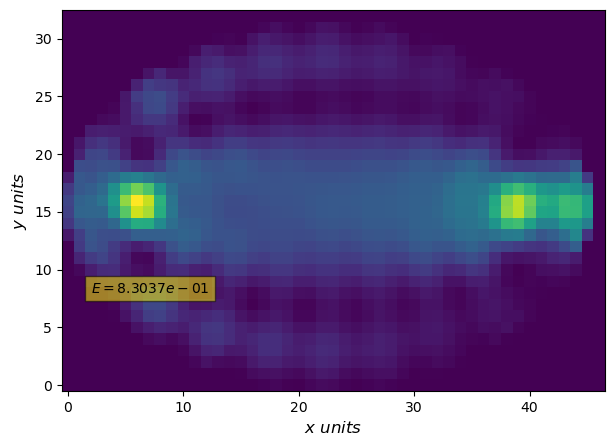

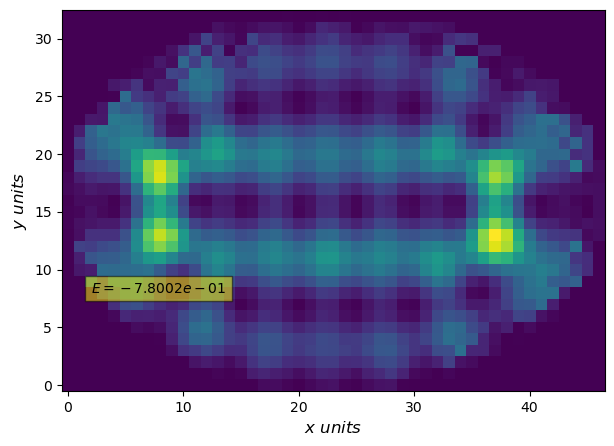

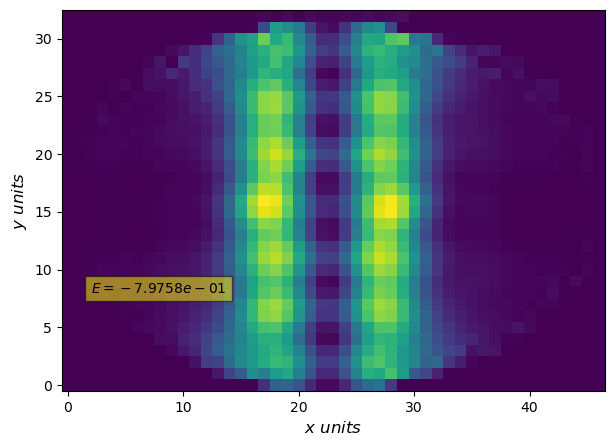

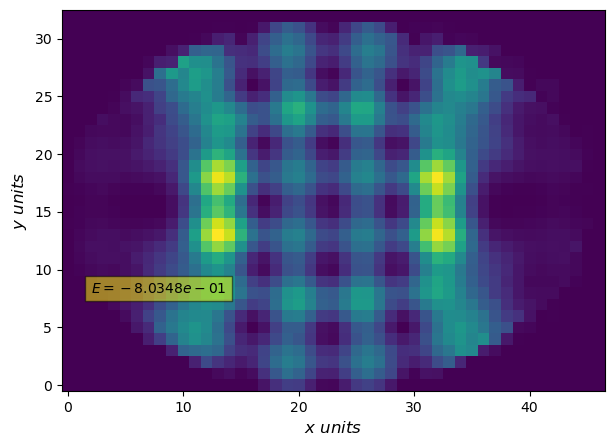

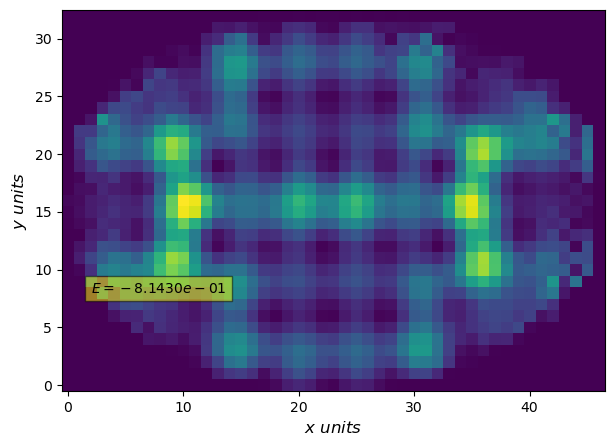

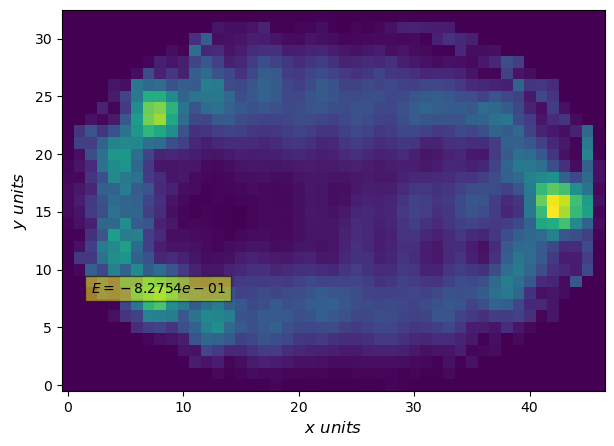

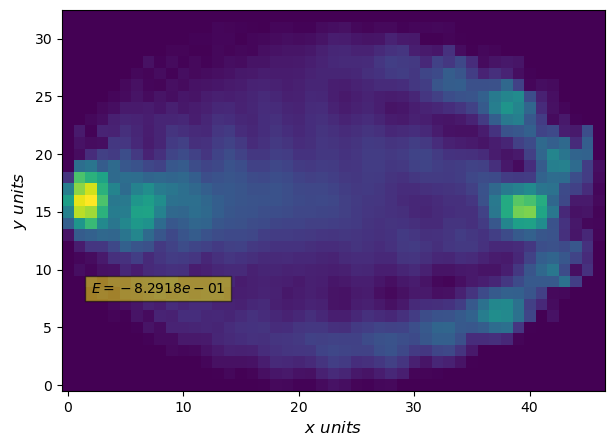

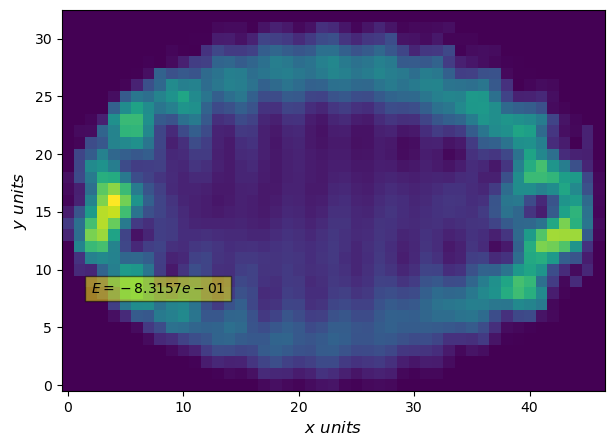

In [27]:
for i in range(nbands):
    to_plot = states[i,:,:,:]

    fig = plt.figure(figsize = (7,7))
    ax = fig.add_subplot(111)
    
    ax.imshow(np.sum(np.abs(to_plot)**2,axis = 0),vmin = 0, origin = 'lower')
    #ax.imshow(np.abs(to_plot[1])**2,vmin = 0,cmap = 'cividis') This would plot only spin down probability density
    formatted_number = f"{ener[i]:.4e}"
    plt.text(2, 8,rf'$E ={formatted_number}$' , fontsize=10, bbox=dict(facecolor='yellow', alpha=0.5))
    
    ax.set_ylabel(r"$y$ $units$",fontsize = 12)
    ax.set_xlabel(r"$x$ $units$",fontsize = 12)
    
    
    fig.show()

(-150.0, 150.0)

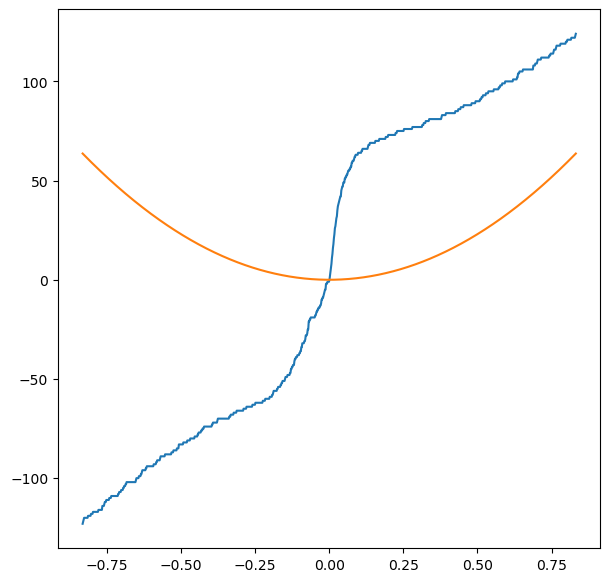

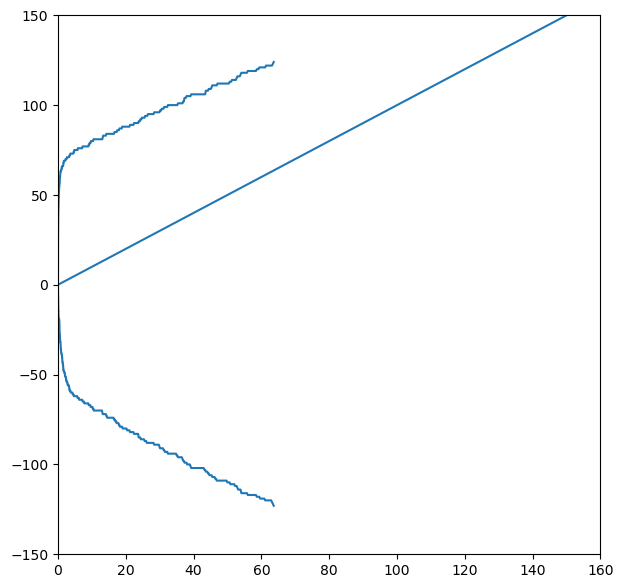

In [28]:
def staircase_function(energy, ener):
    '''Staircase function.'''
    return np.where(np.sort(np.append(ener, energy)) == energy)[0][0]

energies = np.linspace(-max(ener), max(ener),1000)
staircase = np.zeros(len(energies))
for i, e in enumerate(energies):
    staircase[i] = staircase_function(e,ener)

fig = plt.figure(figsize = (7,7))
ax = fig.add_subplot(111)
ax.plot(energies, staircase-staircase[len(staircase)//2]*np.ones(len(staircase)))
ax.plot(energies, pi*(parameters['Nx']//2)*(parameters['Ny']//2)*energies**2/4/pi)
# ax.axhline(0)
# ax.axhline(0)
# ax.set_xlim(-0.25,0.25)
# ax.set_ylim(-25,25)

fig = plt.figure(figsize = (7,7))
ax = fig.add_subplot(111)
ax.plot(pi*(parameters['Nx']//2)*(parameters['Ny']//2)*energies**2/4/pi, staircase-staircase[len(staircase)//2]*np.ones(len(staircase)))
ax.axline((0,0), slope = 1)
ax.set_xlim(0,160)
ax.set_ylim(-150,150)

(0.0, 1.0)

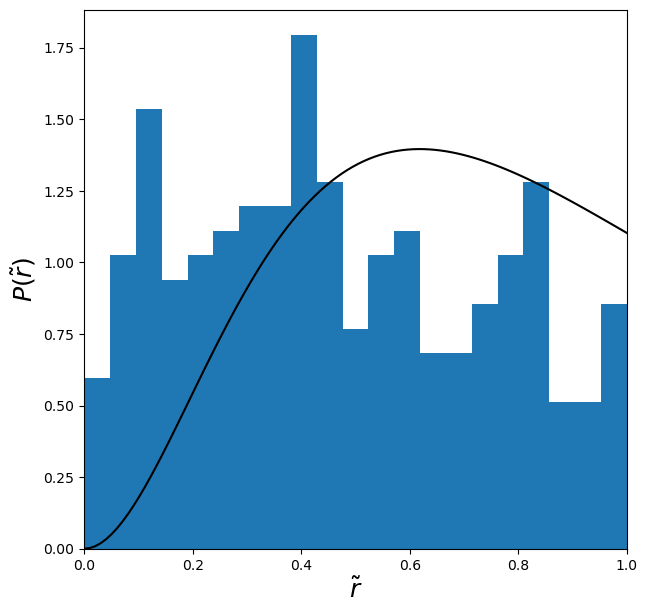

In [29]:
def spacing_ratios_distribution(spectrum, nbins = 41):
    
    spacings = (np.sort(spectrum)-np.roll(np.sort(spectrum),1))[1:]
    ratios = (spacings/np.roll(spacings,1))[1:]
    ratios = np.where(ratios<1, ratios, 1/ratios)
    histogram, bin_edges = np.histogram(ratios, range = (0,1), bins = nbins, density = True )
    
    return histogram, bin_edges

nbins_spacing = 21
ratios_distribution_ellipse, bin_edges_ellipse = spacing_ratios_distribution(ener, nbins = nbins_spacing)

x_ellipse = (bin_edges_ellipse[1:]+bin_edges_ellipse[:-1])/2
dx_ellipse = (bin_edges_ellipse[1]-bin_edges_ellipse[0])
x_analytical = np.linspace(0,1,100)
analytical_gue = (81*np.sqrt(3)/(2*pi))*(x_analytical+x_analytical**2)**2/(1+x_analytical+x_analytical**2)**4

fig = plt.figure(figsize = (7,7))
ax = fig.add_subplot(111)
ax.bar(x_ellipse,ratios_distribution_ellipse,width = dx_ellipse)
ax.plot(x_analytical,analytical_gue, c = 'k')
ax.set_ylabel(r"$P(\tilde{r})$",fontsize = 18)
ax.set_xlabel(r"$\tilde{r}$",fontsize = 18)
ax.set_xlim(0,1)